+ Output variable -> y
+ y -> Whether the client has subscribed a term deposit or not 
+ Binomial ("yes" or "no")

###### Attribute information for bank dataset
+ Input variables:bank client data:
   + 1 - age (numeric)
   + 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   + 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   + 4 - education (categorical: "unknown","secondary","primary","tertiary")
   + 5 - default: has credit in default? (binary: "yes","no")
   + 6 - balance: average yearly balance, in euros (numeric) 
   + 7 - housing: has housing loan? (binary: "yes","no")
   + 8 - loan: has personal loan? (binary: "yes","no")
+ related with the last contact of the current campaign:
   + 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  + 10 - day: last contact day of the month (numeric)
  + 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  + 12 - duration: last contact duration, in seconds (numeric)
+ other attributes:
  + 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  + 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  + 15 - previous: number of contacts performed before this campaign and for this client (numeric)
  + 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

+ Output variable (desired target):
  + 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

+ Missing Attribute Values: None


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Calling dataset into python environment
Data=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\6.Logistic Regression\bank-full.csv',delimiter=';')
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
Bank_data=Data.copy()

In [4]:
#shape of data
Data.shape

(45211, 17)

In [5]:
#column names
Data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
#basic information
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#duplicate values
Data.duplicated().sum()

0

In [8]:
#checking null values
Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
#summary statistics
Data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
# Find columns with numerical data types
numerical_features=[feature for feature in Data.columns if Data[feature].dtypes != 'O']

print('Number of numerical variables:',len(numerical_features))

Data[numerical_features].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


+ There are two types of numerical variables:

  + 1. Continuous variables: Continuous variables can take on any numeric value within a specific range. They are measured and can have an infinite number of possible values. Examples of continuous variables include age, height, weight, and income.

  + 2. Discrete variables: Discrete variables can only take on specific numeric values. They are usually whole numbers and represent counts or quantities. Examples of discrete variables include the number of children in a family, the number of pets owned, or the number of items purchased.

In [11]:
# Initialize lists for discrete and continuous variables
discrete_features=[]
continuous_features=[]

# Iterate over numerical columns
for column in numerical_features:
    unique_values=Data[column].nunique()
    
    # Set a threshold to determine if a variable is discrete or continuous
    threshold = 10
    
    if unique_values<=threshold:
        discrete_features.append(column)
    else:
        continuous_features.append(column)

# Print the discrete and continuous features
print("Discrete Features:")
print(discrete_features)
print("\nContinuous Features:")
print(continuous_features)

Discrete Features:
[]

Continuous Features:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [12]:
categorical_features=[feature for feature in Data.columns if Data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n',categorical_features)

Data[categorical_features].head()

Number of Categorical Features: 10 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


###### From the given data we can understand that:
+ There are 45211 rows & 17 columns.
+ The column names are:'age','job','marital','education','default','balance','housing','loan','contact','day','month','duration', 'campaign', 'pdays','previous', 'poutcome', 'y'.
+ 'y' is dependent column & others are independent columns.
+ There are 7 numerical variables & all are continues nummeric variables.They are: 
  'age','balance','day','duration','campaign','pdays','previous'.
+ There are 10 categorical variables.They are:
  'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'
+ There are no null values & duplicate values.  

In [13]:
#checking correlation
Data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


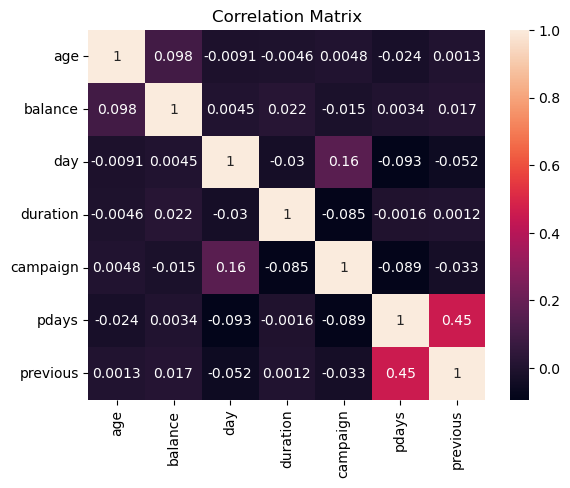

In [14]:
# plotting Correlation matrix
corr_matrix=Data.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

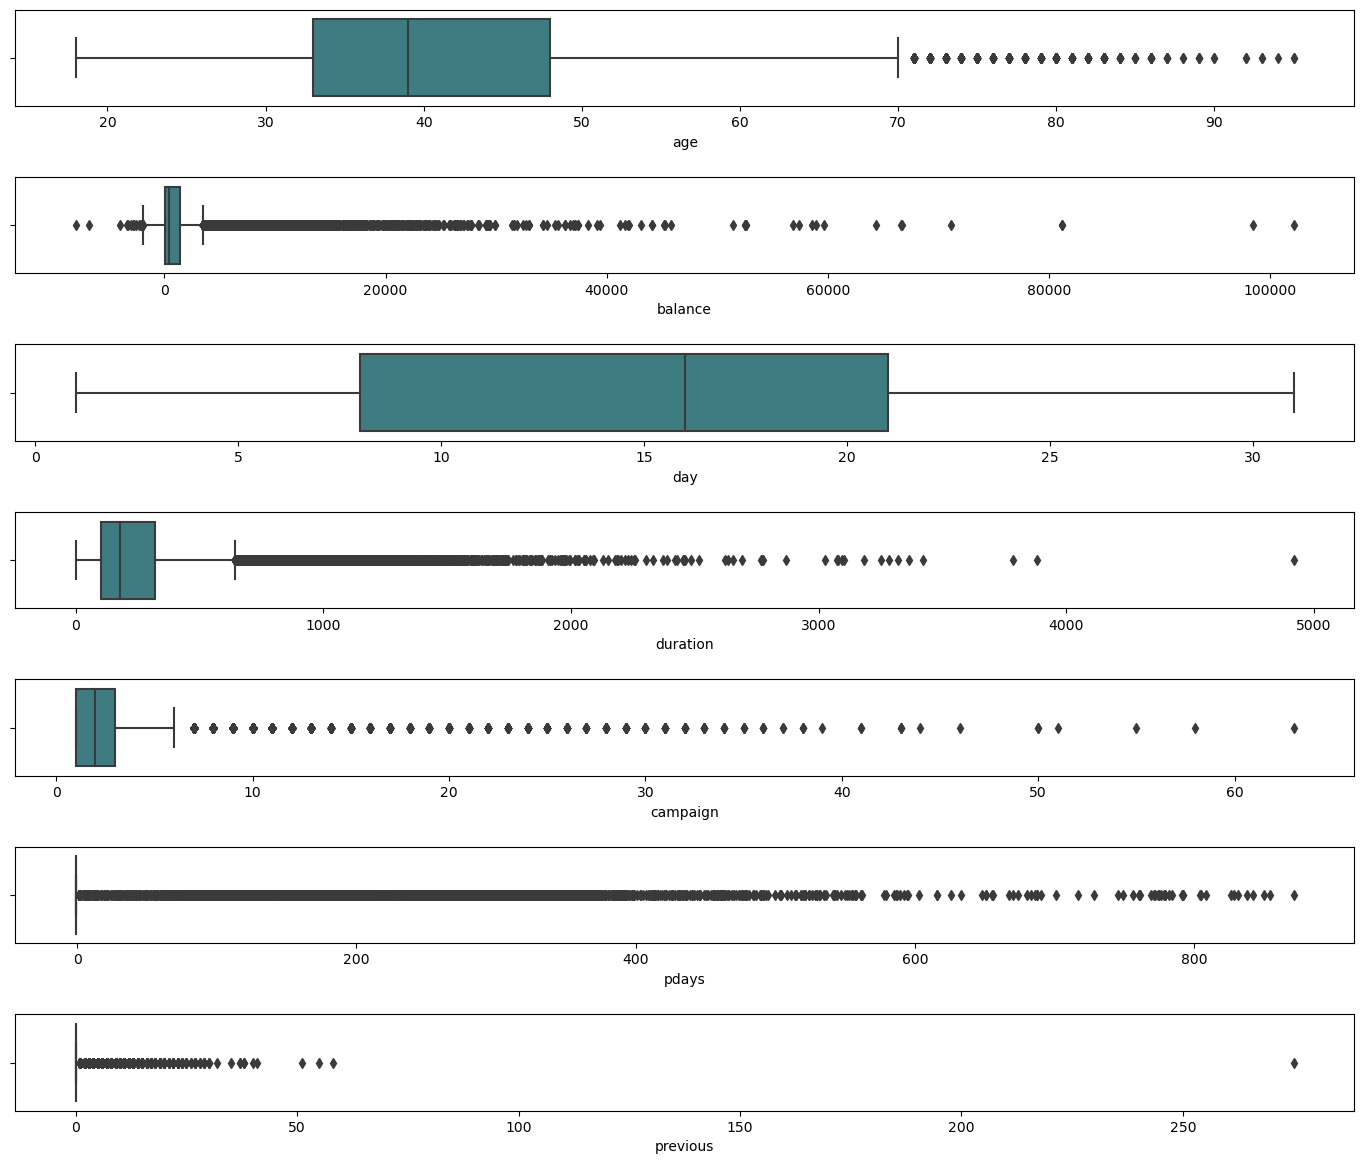

In [15]:
#checking for outliers
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=Data,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=Data,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=Data,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=Data,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=Data,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=Data,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=Data,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

There are lot of outliers present, but we can't drop them because they are present in a very large quantity and can be important for model building.

In [16]:
Log_data=Data.copy()

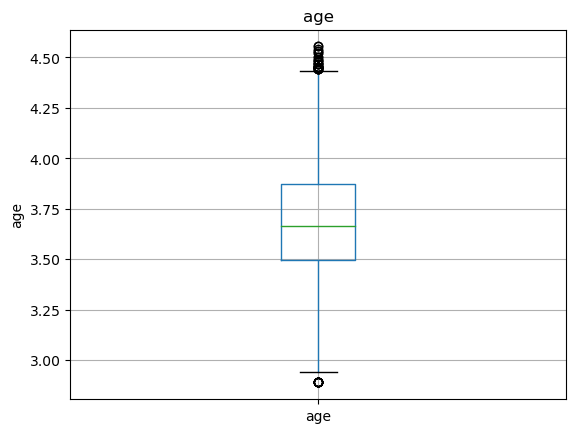

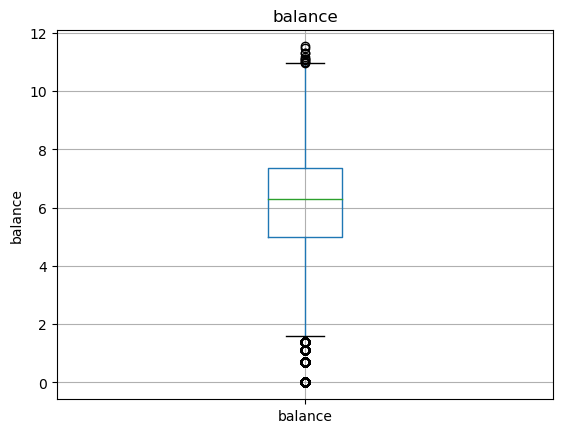

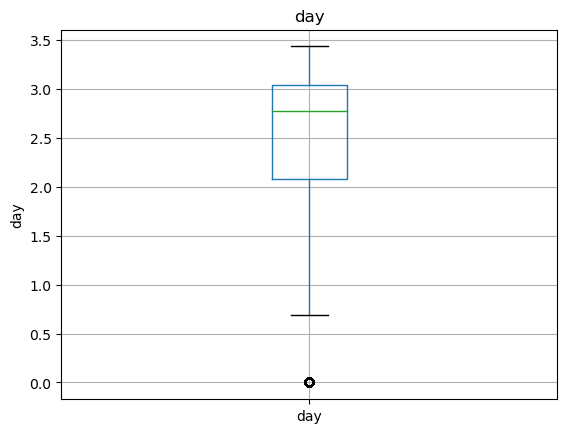

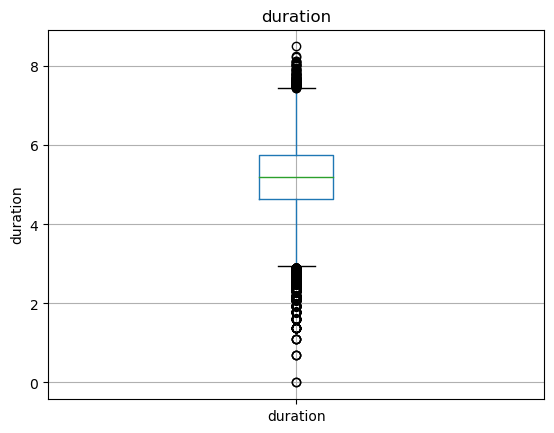

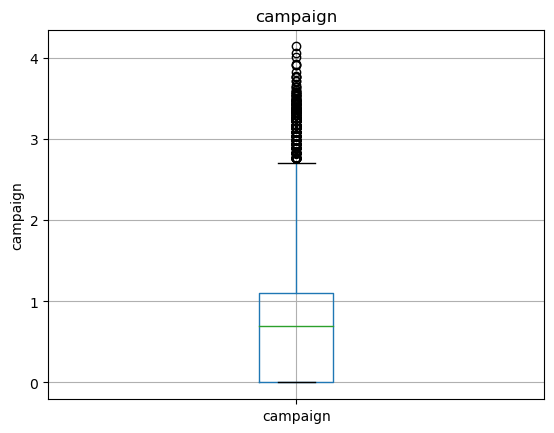

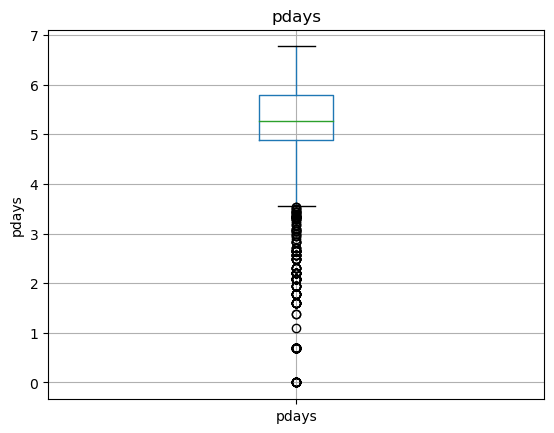

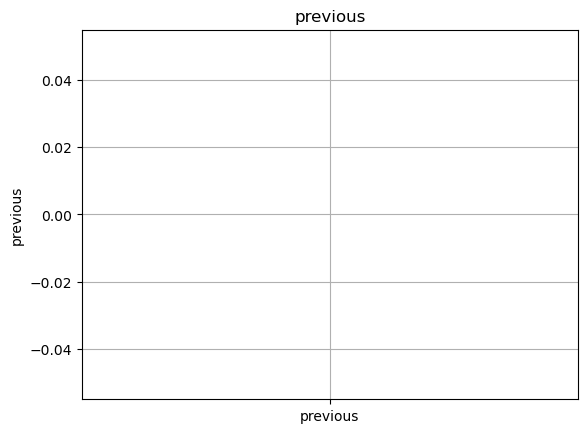

In [17]:
#checking outliers after log transformation
for feature in continuous_features:
    Log_data[feature]=np.log(Log_data[feature])
    Log_data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Still outliers are present.

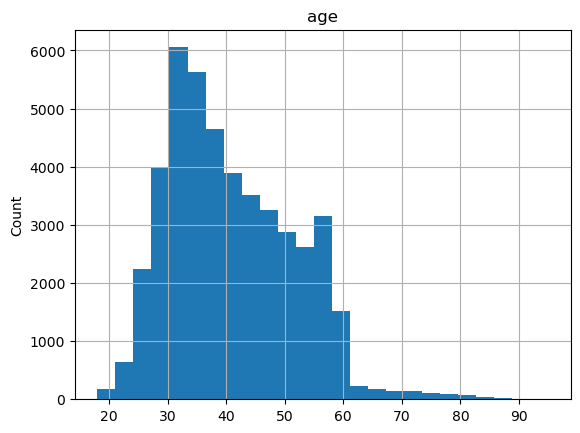

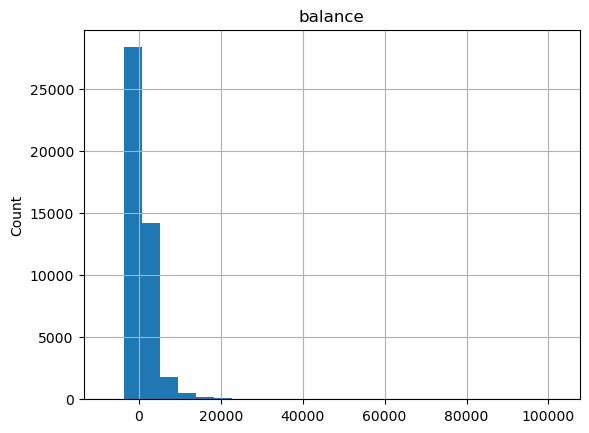

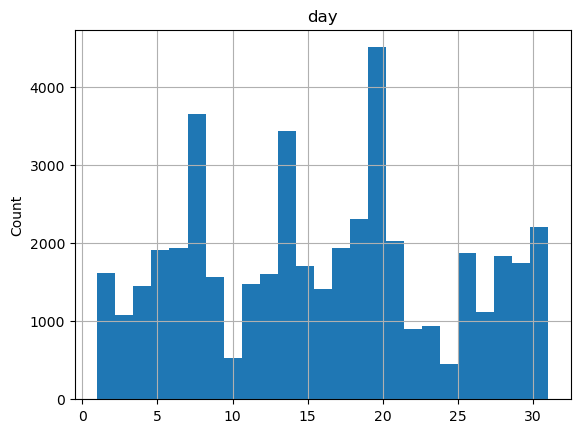

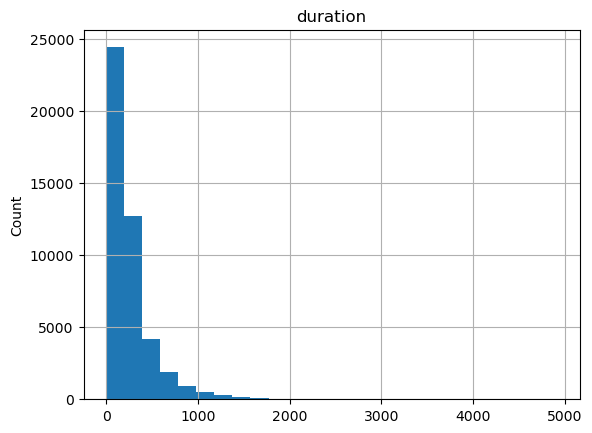

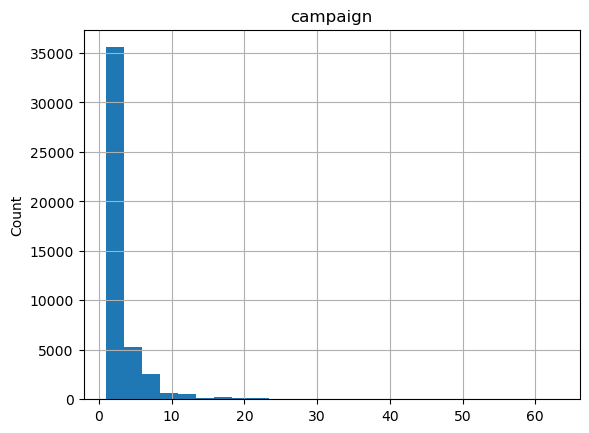

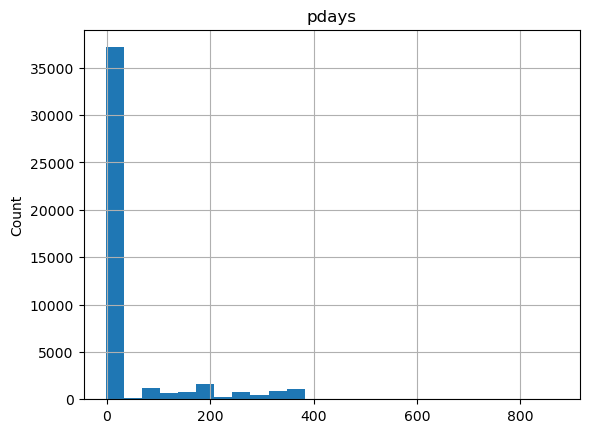

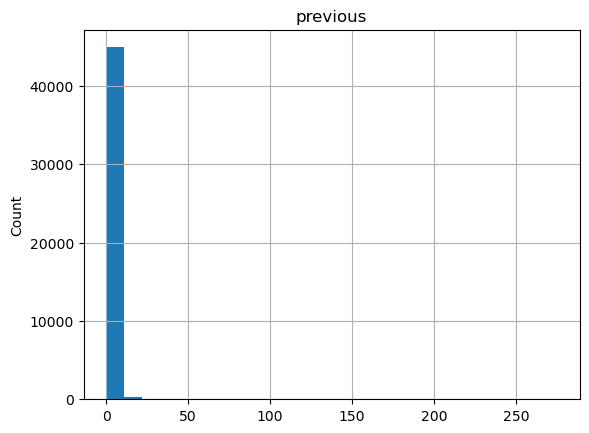

In [18]:
#checking distribution of continuous features
for feature in continuous_features:
    Data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [19]:
#checking normality using shapiro-wilk test
import scipy.stats as stats


# Function to perform the Shapiro-Wilk test for normality
def test_normality(Data):
    p_value=stats.shapiro(Data)[1]
    alpha=0.05

    if p_value>alpha:
        return "Normal distribution (fail to reject H0)"
    else:
        return "Not a normal distribution (reject H0)"

# Test normality for each continuous feature
for feature in continuous_features:
    result=test_normality(Data[feature])
    print(f"{feature}: {result}")

age: Not a normal distribution (reject H0)
balance: Not a normal distribution (reject H0)
day: Not a normal distribution (reject H0)
duration: Not a normal distribution (reject H0)
campaign: Not a normal distribution (reject H0)
pdays: Not a normal distribution (reject H0)
previous: Not a normal distribution (reject H0)


The Shapiro-Wilk test is performed using stats.shapiro() from the SciPy library. The null hypothesis (H0) is that the data follows a normal distribution. If the p-value is greater than the significance level (alpha), which is commonly set to 0.05, we fail to reject the null hypothesis, indicating a normal distribution. Otherwise, we reject the null hypothesis, suggesting a departure from normality.

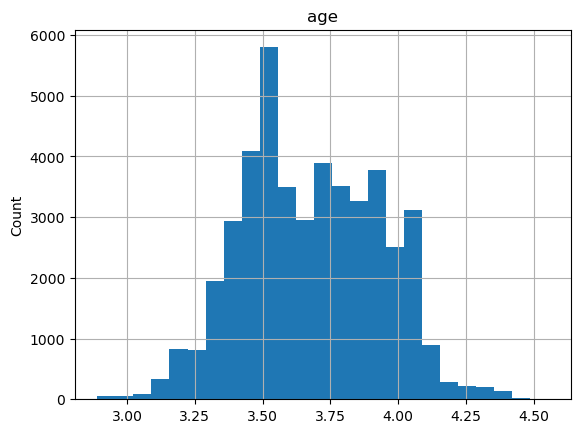

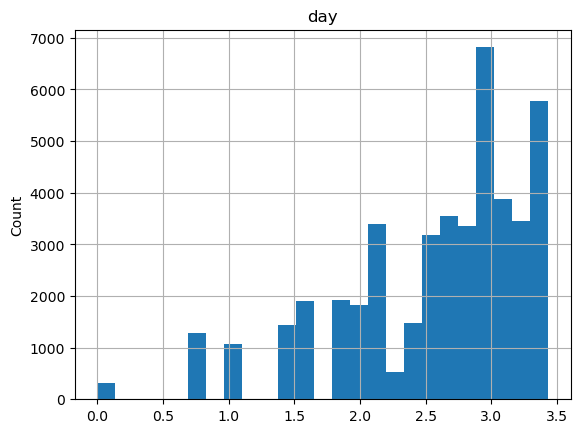

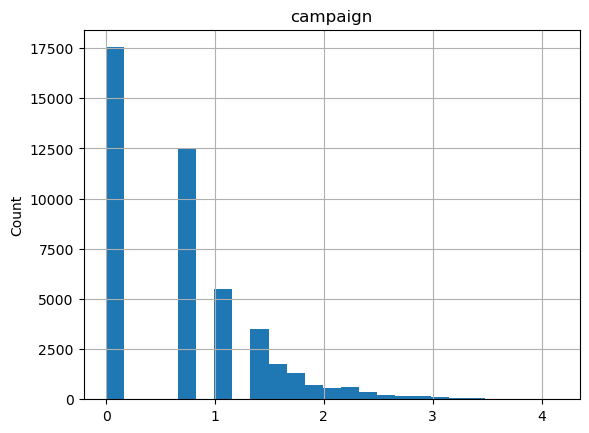

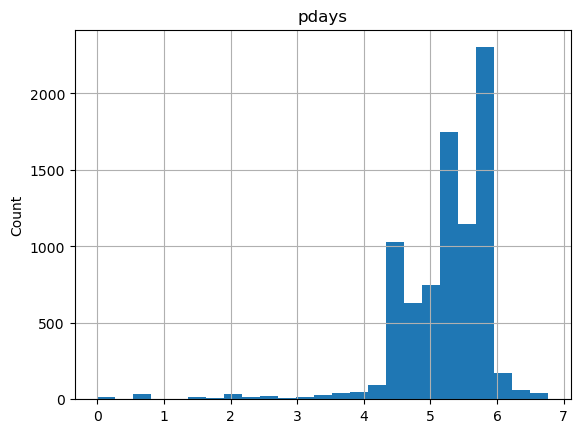

In [20]:
Log_data=Data.copy()

#checking distribution after log transformation
for feature in continuous_features:
    if 0 in Log_data[feature].unique():
        pass
    else:
        Log_data[feature]=np.log(Log_data[feature])
        Log_data[feature].hist(bins=25)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

###### Visualization

It is very important to look at the dependent column, which holds the information, which we are going to predict. In our case we should look at 'y' column and compare its values to other columns. First of all we should look at the number of 'yes' and 'no' values in the response column 'y'.

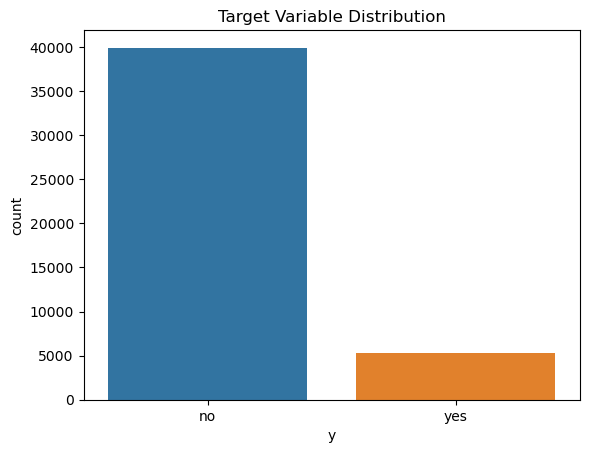

In [21]:
#Visualization of dependent variable
sns.countplot(x='y',data=Data)
plt.title("Target Variable Distribution")
plt.show()

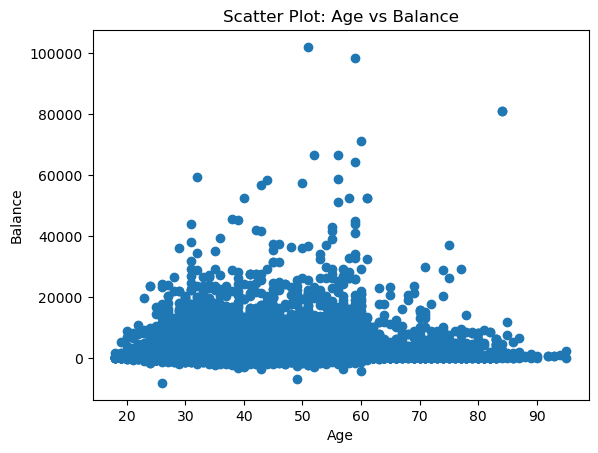

In [22]:
# Plotting the scatter plot between age & balance
plt.scatter(Data['age'],Data['balance'])
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot: Age vs Balance')
plt.show()

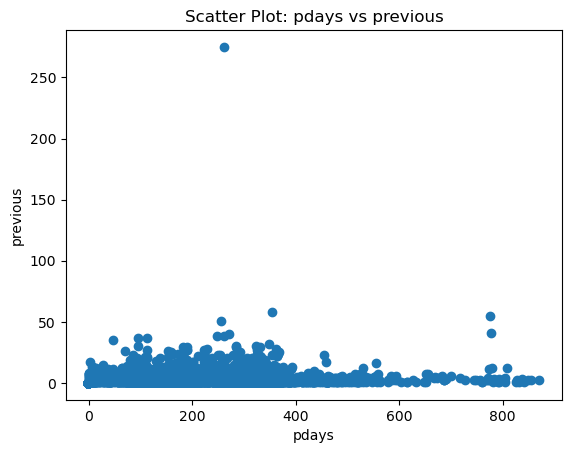

In [23]:
# Plotting the scatter plot between pdays & previous
plt.scatter(Data['pdays'],Data['previous'])
plt.xlabel('pdays')
plt.ylabel('previous')
plt.title('Scatter Plot: pdays vs previous')
plt.show()

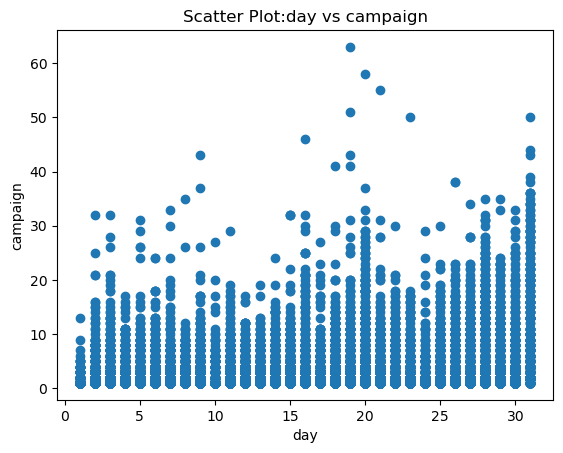

In [24]:
# Plotting the scatter plot between day & campagin
plt.scatter(Data['day'],Data['campaign'])
plt.xlabel('day')
plt.ylabel('campaign')
plt.title('Scatter Plot:day vs campaign')
plt.show()

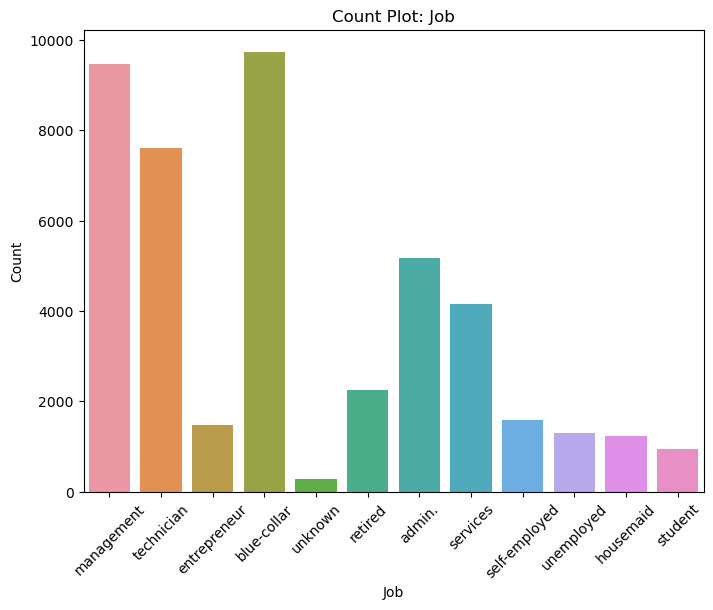

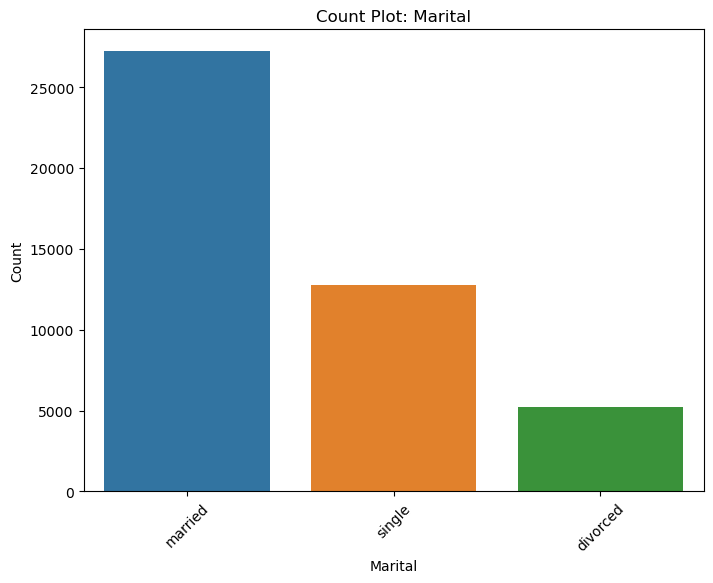

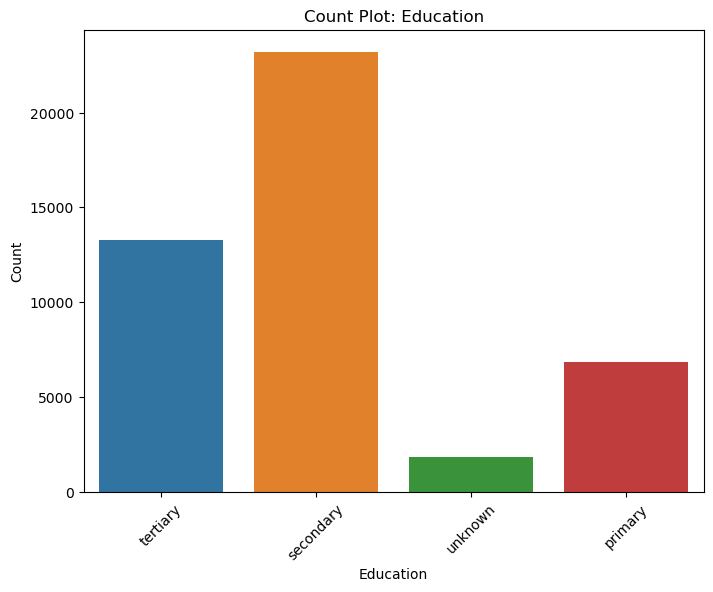

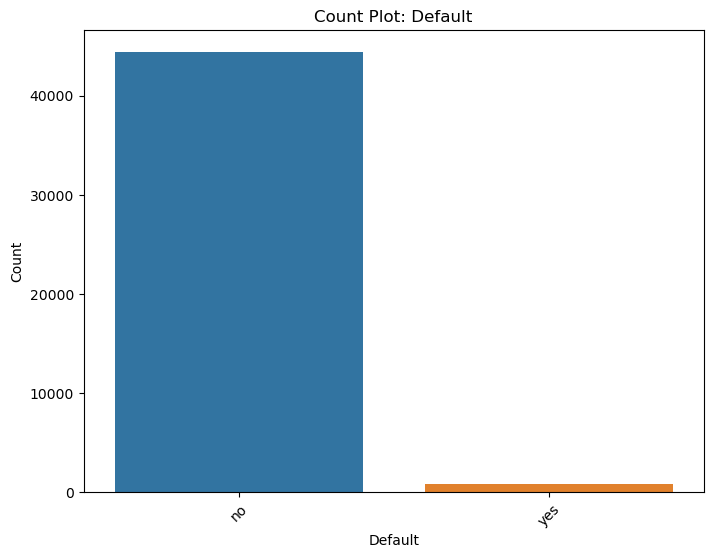

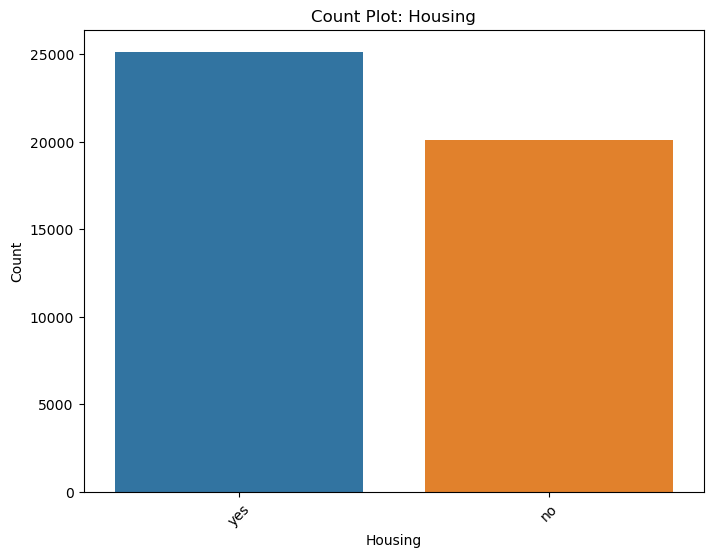

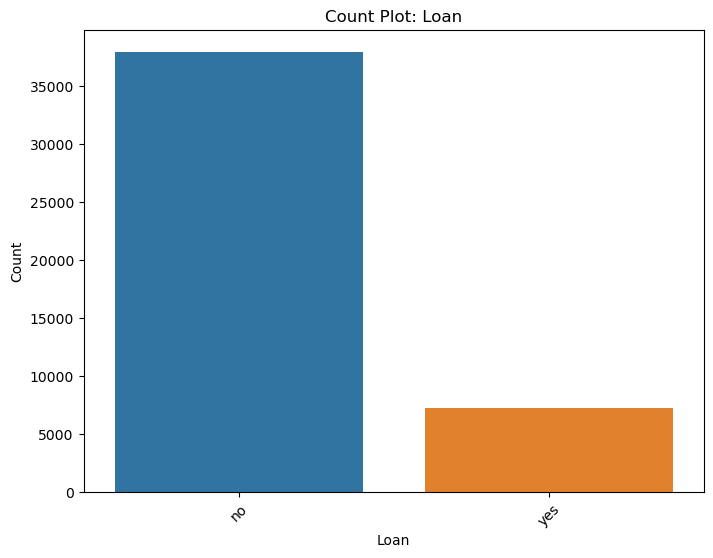

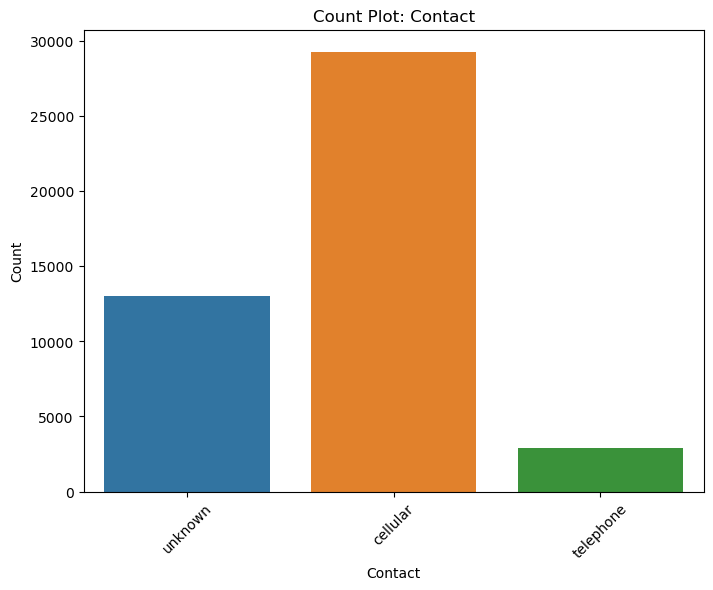

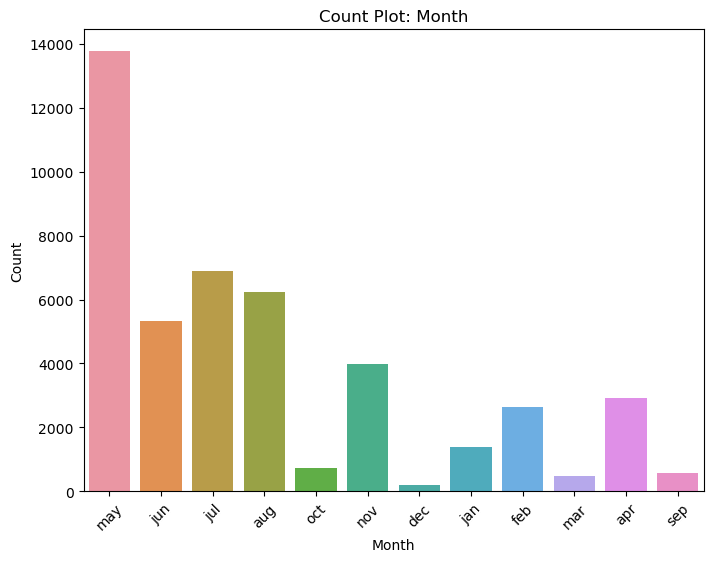

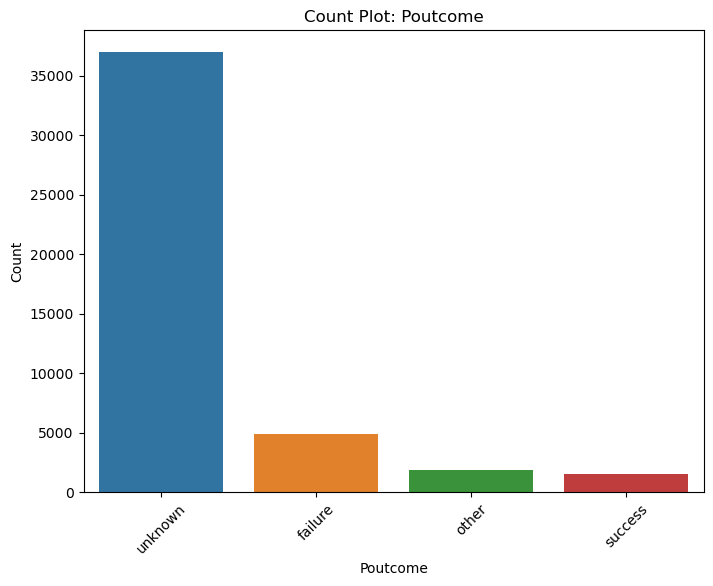

In [25]:
#plotting graph for categorical features
cat_columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

for cat_columns in cat_columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=cat_columns,data=Data)
        plt.xlabel(cat_columns.capitalize())
        plt.ylabel('Count')
        plt.title(f'Count Plot: {cat_columns.capitalize()}')
        plt.xticks(rotation=45)
        plt.show()

In [26]:
#balance and deposit
b_df=pd.DataFrame()
b_df['balance_yes']=(Data[Data['y']=='yes'][['y','balance']].describe())['balance']
b_df['balance_no']=(Data[Data['y']=='no'][['y','balance']].describe())['balance']
b_df

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<AxesSubplot:title={'center':'Balance and deposit statistics'}>

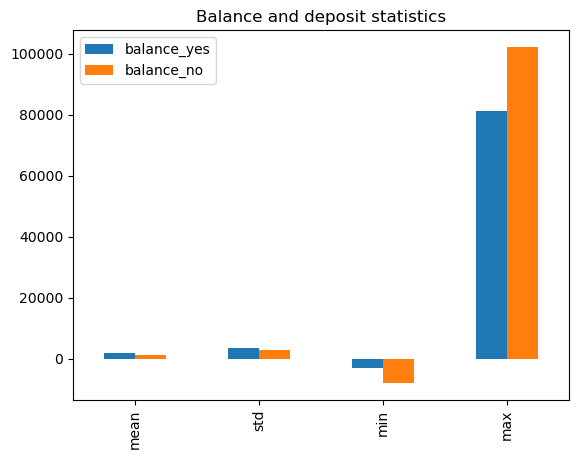

In [27]:
b_df.drop(['count','25%','50%','75%']).plot.bar(title='Balance and deposit statistics')

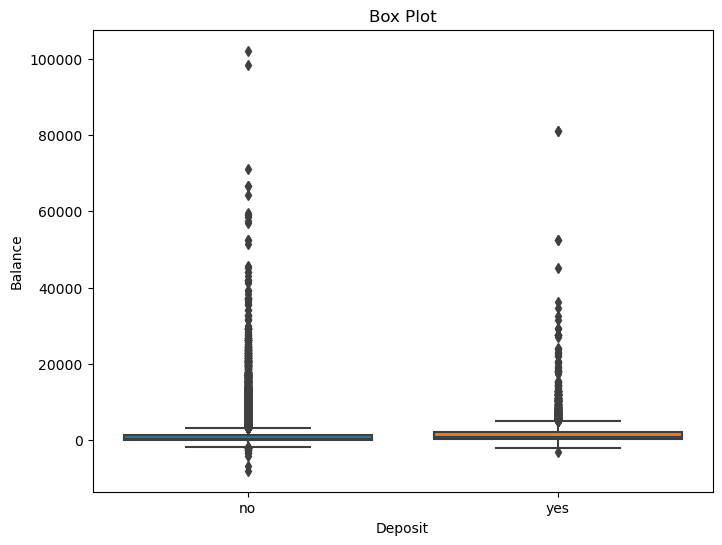

In [28]:
#box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=Data['y'], y=Data['balance'],data=Data)
plt.xlabel('Deposit')
plt.ylabel('Balance')
plt.title('Box Plot')
plt.show()

In [29]:
#age and deposit
a_df=pd.DataFrame()
a_df['age_yes']=(Data[Data['y']=='yes'][['y','age']].describe())['age']
a_df['age_no']=(Data[Data['y']=='no'][['y','age']].describe())['age']
a_df

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<AxesSubplot:title={'center':'Age and deposit statistics'}>

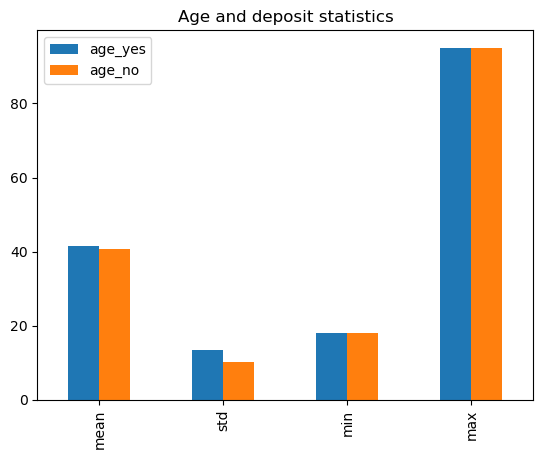

In [30]:
a_df.drop(['count','25%','50%','75%']).plot.bar(title='Age and deposit statistics')

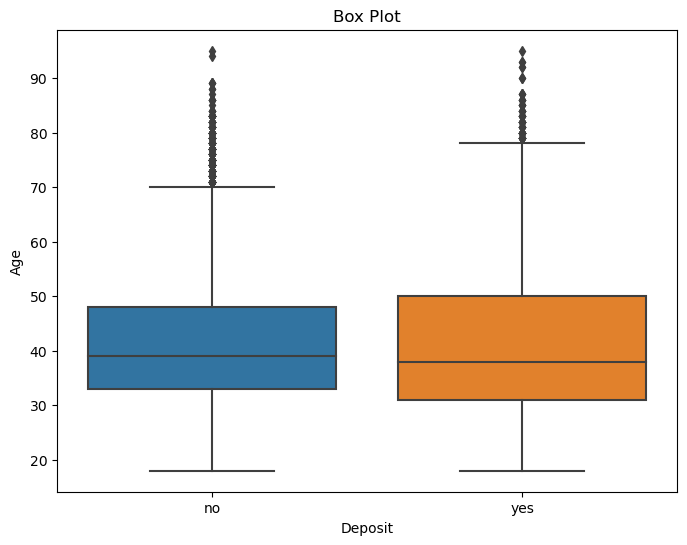

In [31]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=Data['y'], y=Data['age'],data=Data)
plt.xlabel('Deposit')
plt.ylabel('Age')
plt.title('Box Plot')
plt.show()

In [32]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df=pd.DataFrame()
c_df['campaign_yes']=(Data[Data['y']=='yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no']=(Data[Data['y'] == 'no'][['y','campaign']].describe())['campaign']
c_df

,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Number of contacts performed during this campaign and deposit statistics'}>

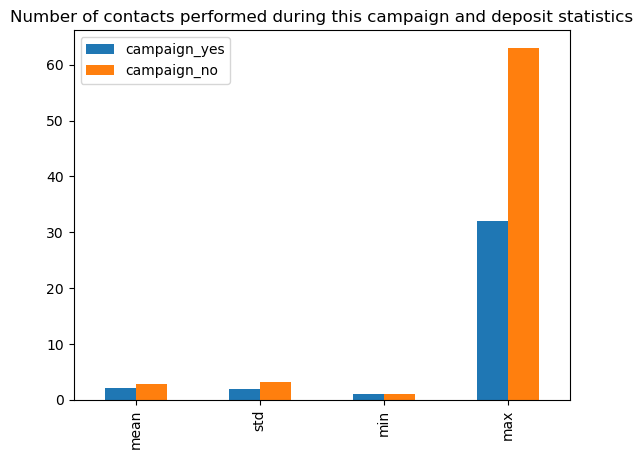

In [33]:
c_df.drop(['count','25%','50%','75%']).plot.bar(title='Number of contacts performed during this campaign and deposit statistics')

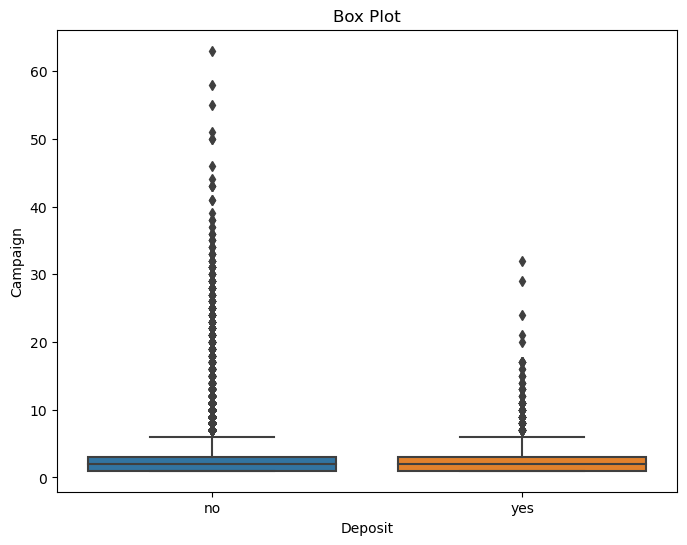

In [34]:
#box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=Data['y'], y=Data['campaign'],data=Data)
plt.xlabel('Deposit')
plt.ylabel('Campaign')
plt.title('Box Plot')
plt.show()

In [35]:
#number of contacts performed before campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes']=(Data[Data['y']=='yes'][['y','previous']].describe())['previous']
p_df['previous_no']=(Data[Data['y']=='no'][['y','previous']].describe())['previous']
p_df

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


<AxesSubplot:title={'center':'Number of contacts performed during previous campaign and deposit statistics'}>

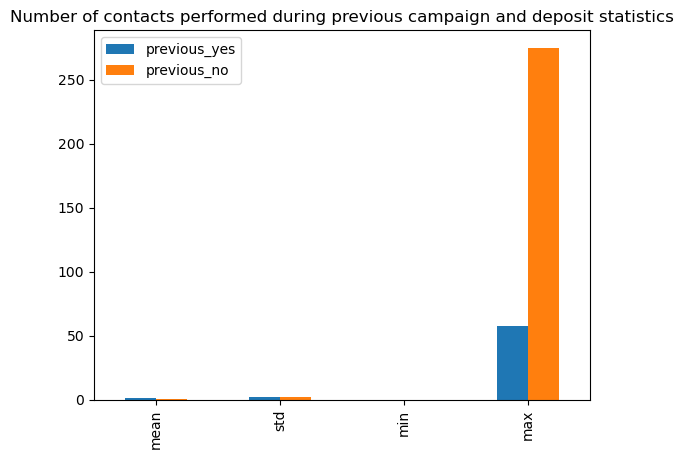

In [36]:
p_df.drop(['count','25%','50%','75%']).plot.bar(title='Number of contacts performed during previous campaign and deposit statistics')

Looking at the diagrams above we can conclude that:
+ People who subscribed for term deposit tend to have greater balance and age values.
+ People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

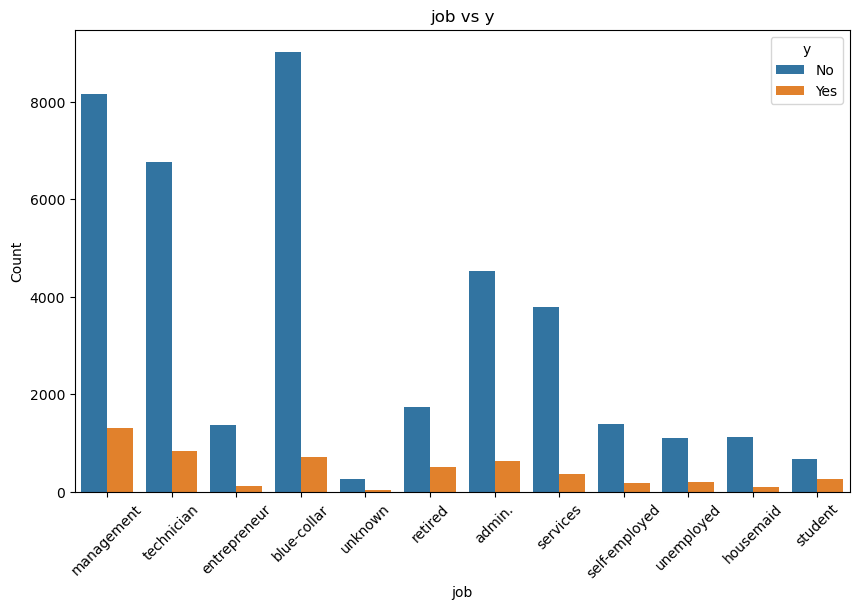

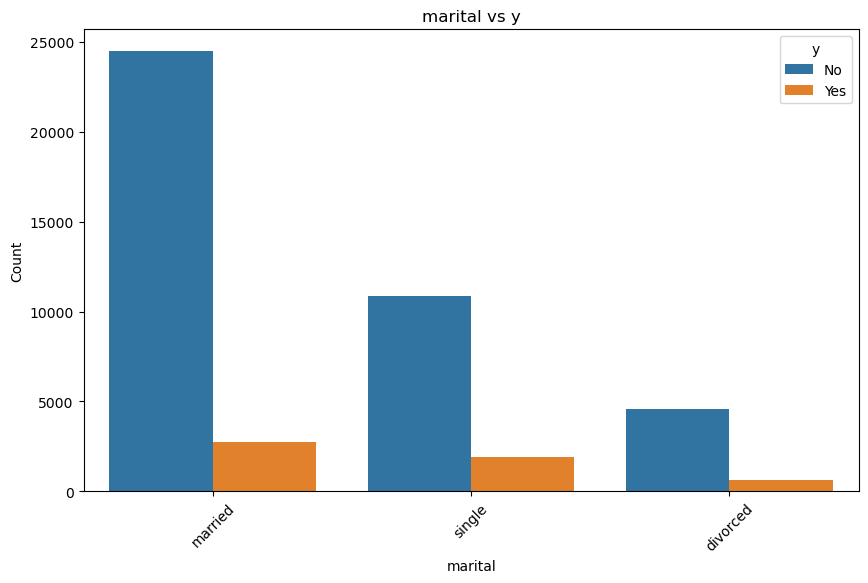

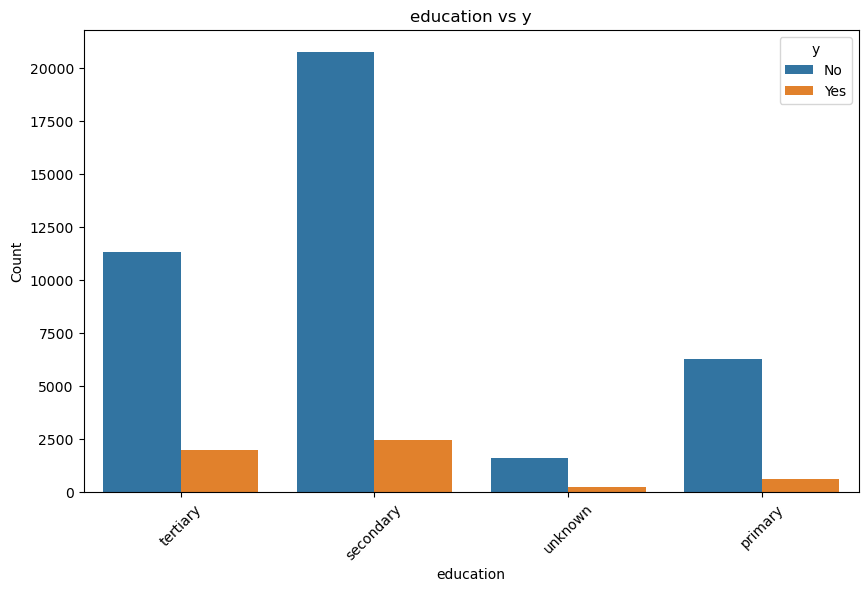

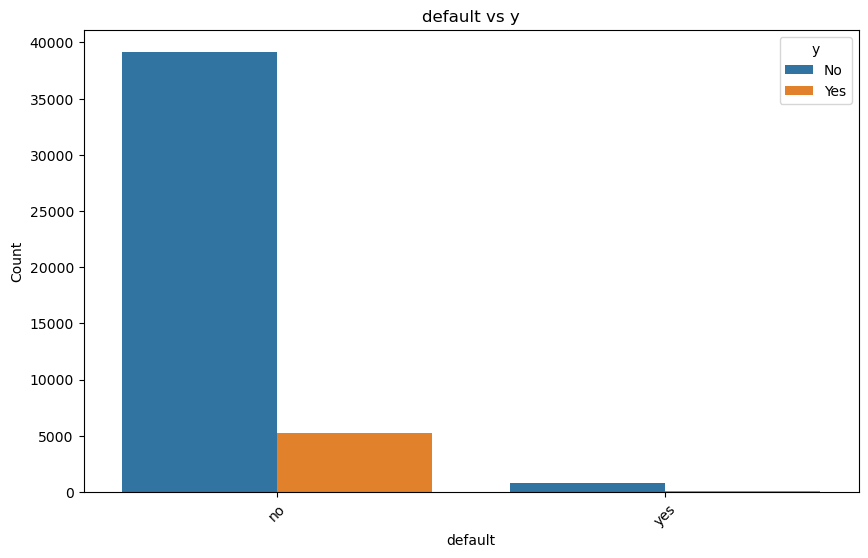

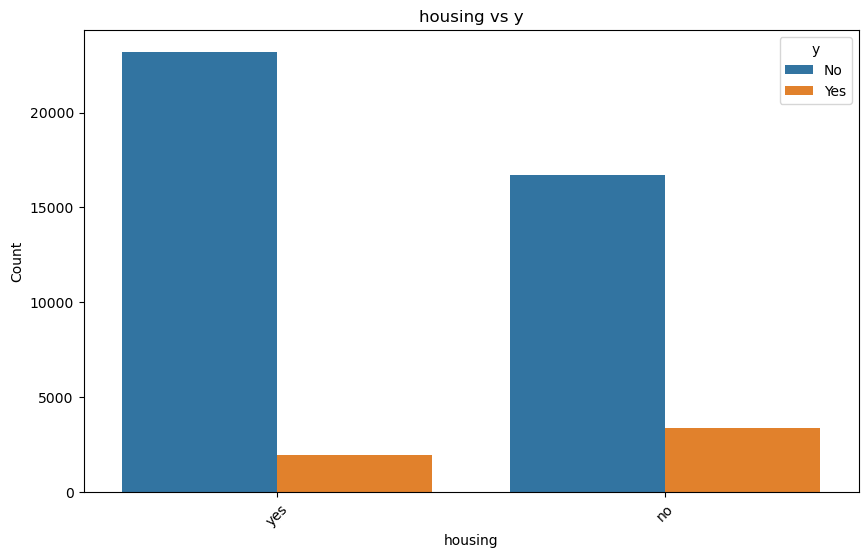

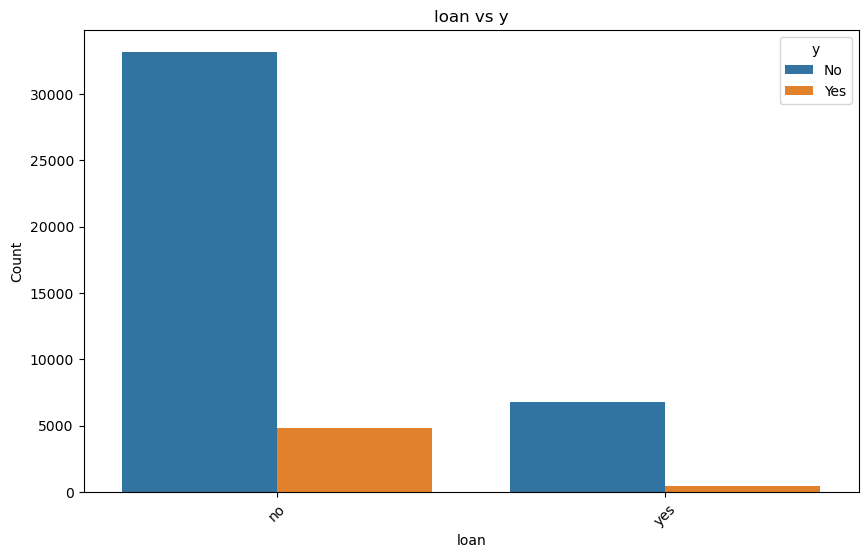

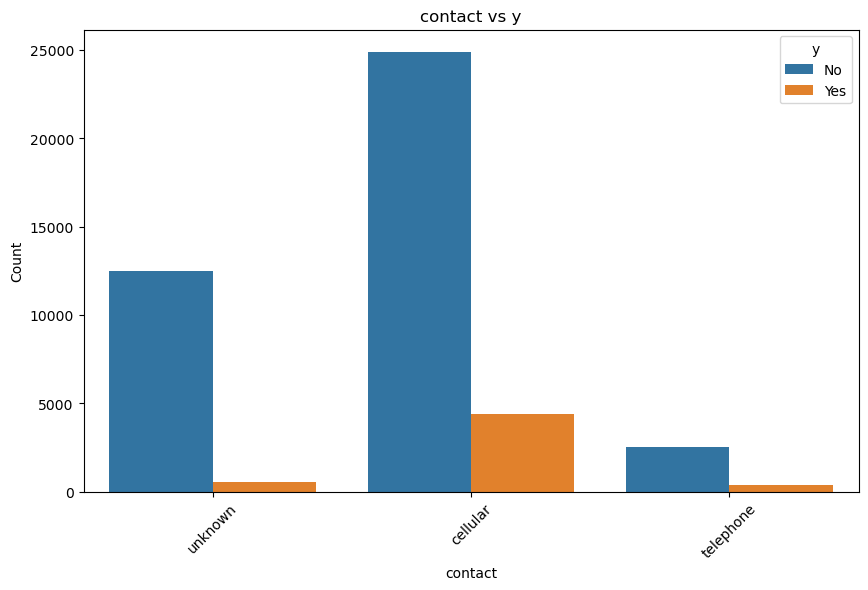

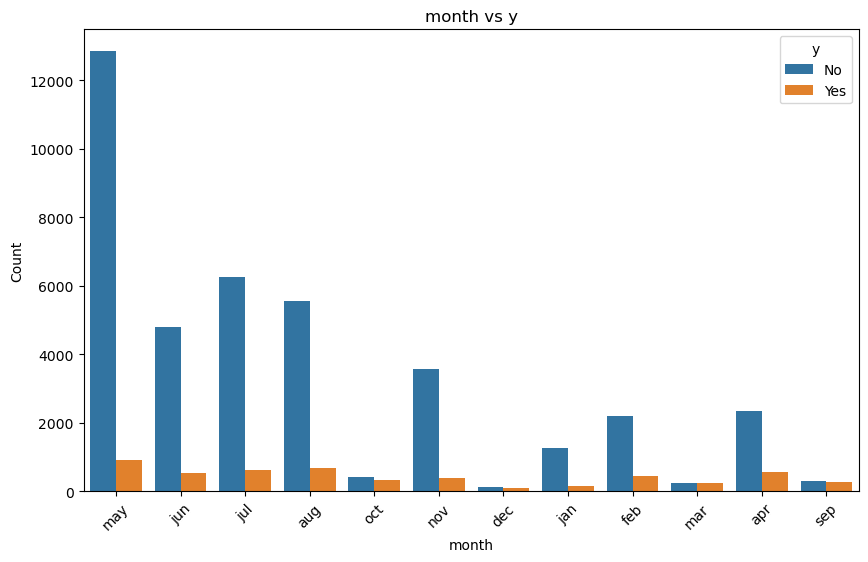

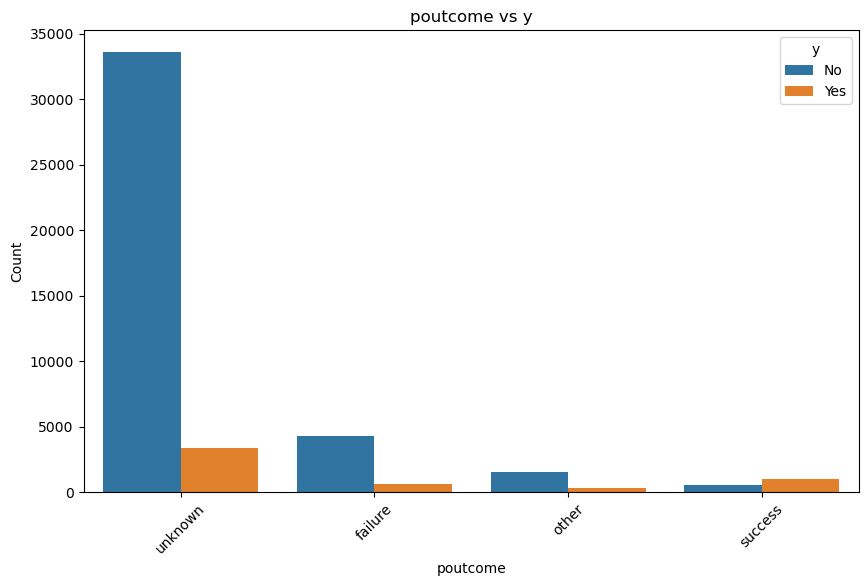

In [37]:
# Plotting each categorical feature against the dependent feature
for feature in ['job','marital','education','default','housing','loan','contact','month','poutcome']:
    plt.figure(figsize=(10,6))
    sns.countplot(x=feature,hue='y',data=Data)
    plt.title(f"{feature} vs y")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='y',labels=['No','Yes'])
    plt.xticks(rotation=45)
    plt.show()

Regarding the diagrams we can tell that,according to our dataset:
+ Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit. 
+ Married customers are less likely to subscribe for term deposit. 
+ Customers with 'cellular' type of contact are less likely to subscribe for term deposit.

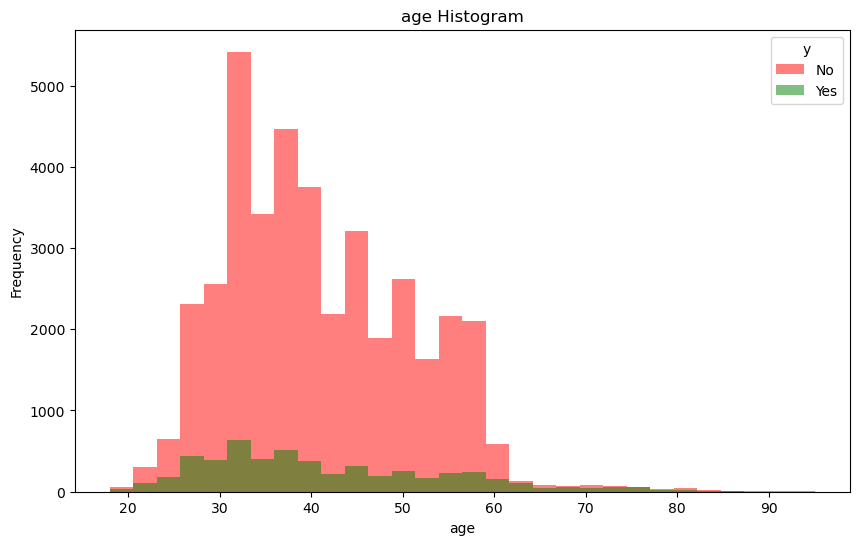

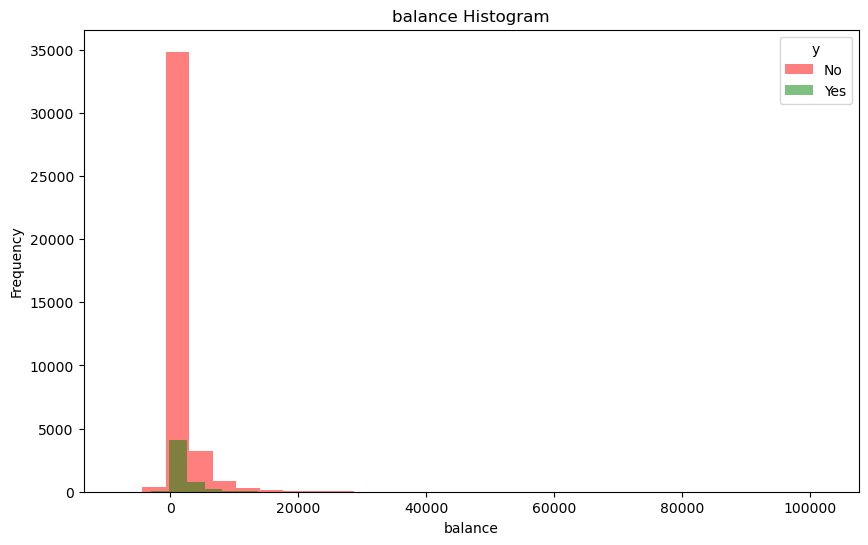

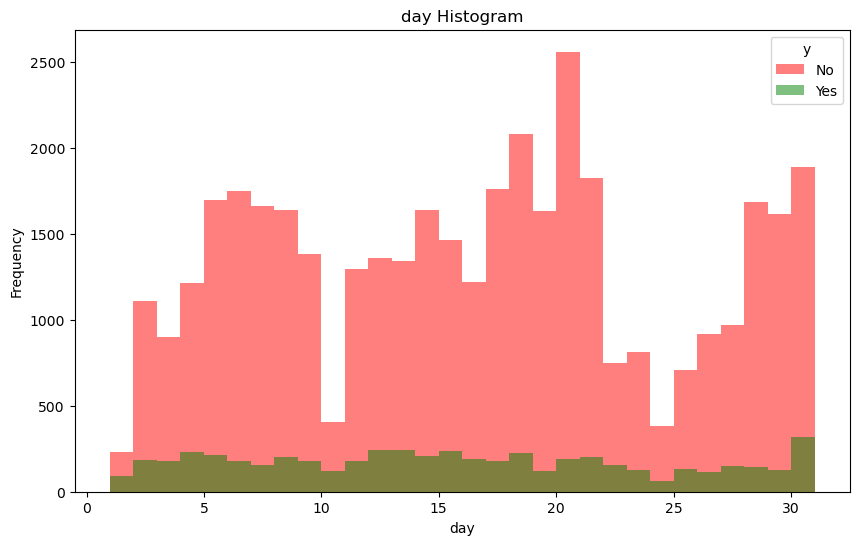

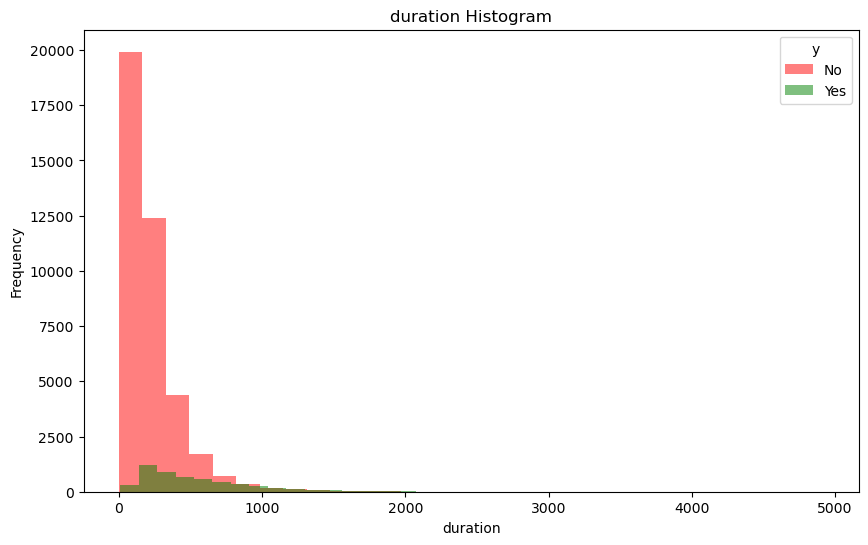

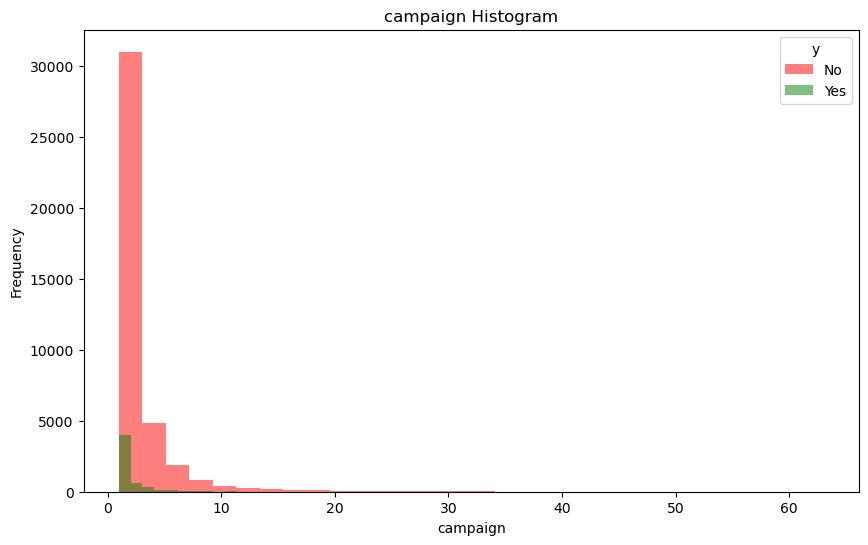

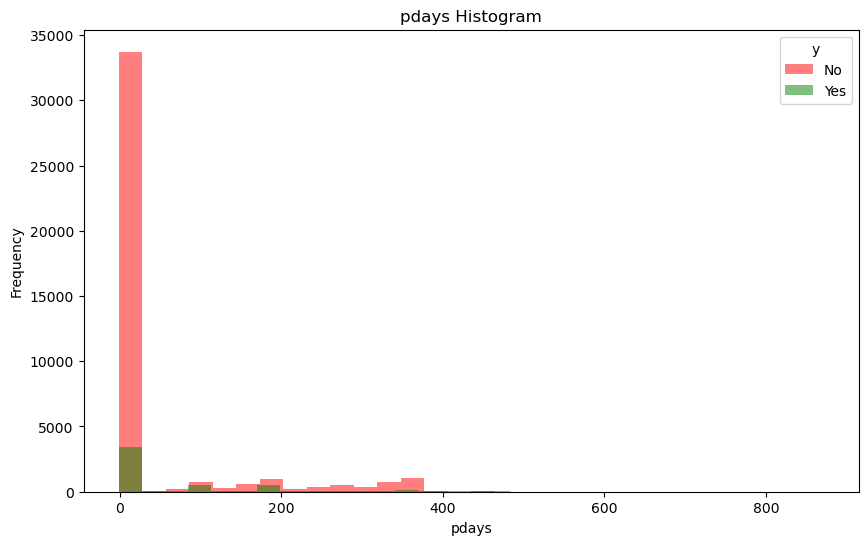

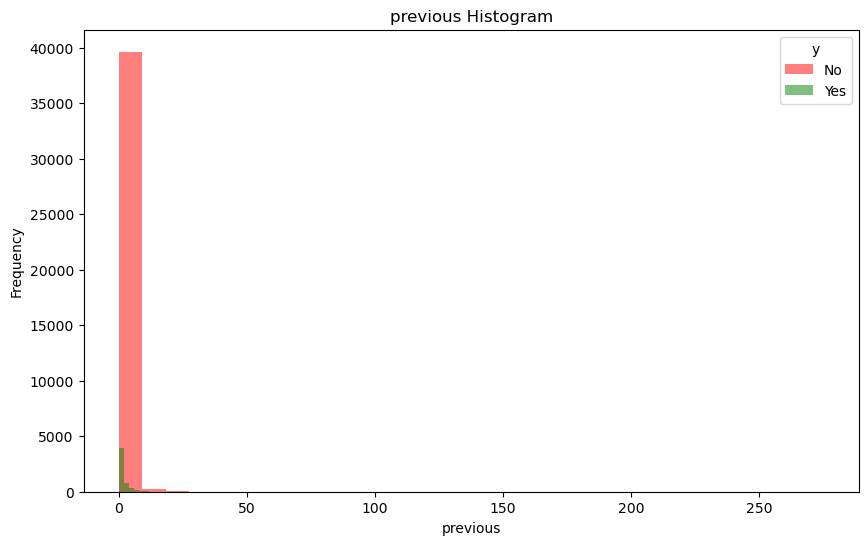

In [38]:
# Plotting histograms for each continuous numeric independent feature
for feature in ['age','balance','day','duration','campaign','pdays','previous']:
    plt.figure(figsize=(10,6))
    plt.hist(Data[Data['y']=='no'][feature],bins=30,alpha=0.5,color='red',label='No')
    plt.hist(Data[Data['y']=='yes'][feature],bins=30,alpha=0.5,color='green',label='Yes')
    plt.title(f"{feature} Histogram")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='y')
    plt.show()

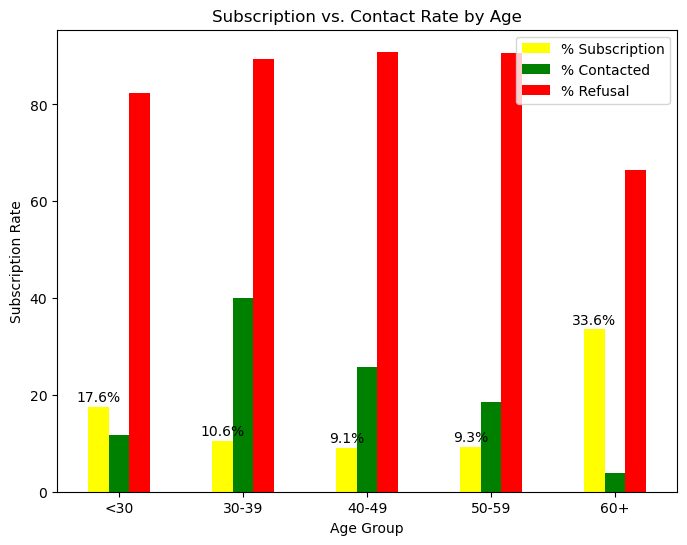

In [39]:
#Visualizing the subscription and contact rate by age
lst=[Data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(Data['y'],Data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(Data['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age['% Refusal'] = count_age_response_pct['no']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscription','% Contacted','% Refusal']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('yellow','green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Subscription'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

+ Insights: target the youngest and the oldest instead of the middle-aged
+ Yellow vertical bars indicate that clients with a age of 60+ have the highest subscription rate. 
+ About 17% of the subscriptions came from the clients aged between 18 to 29.
+ More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

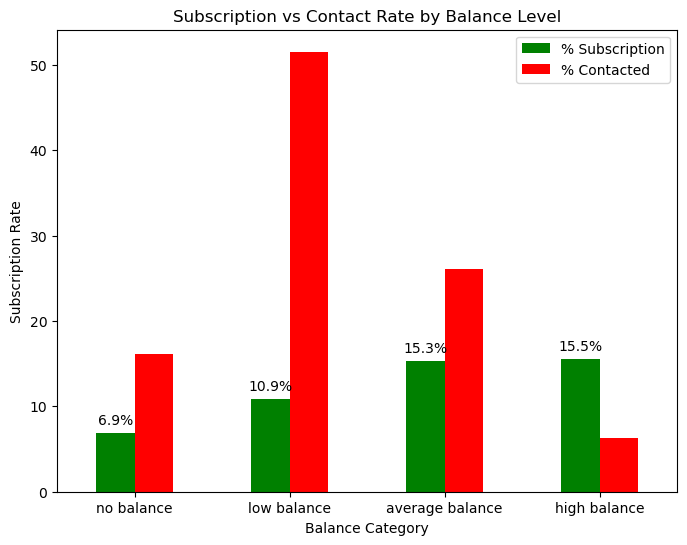

In [40]:
#Visualize the subscription rate by balance level
lst=[Data]
for column in lst:
    column.loc[column["balance"] <= 0,'balance_group']='no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group']='low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group']='average balance'
    column.loc[(column["balance"] > 5000), 'balance_group']='high balance'
    
count_balance_response_pct=pd.crosstab(Data['y'],Data['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct=count_balance_response_pct.transpose()

bal=pd.DataFrame(Data['balance_group'].value_counts())
bal['% Contacted']=bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription']=count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal=bal.sort_values('bal',ascending = True)

plot_balance=bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation='horizontal')

# label the bar
for rec,label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

+ Insights: target clients with average or high balance
+ To identify the trend more easily, clients are categorized into four groups based on their levels of balance:
  + No Balance: clients with a negative balance.
  + Low Balance: clients with a balance between 0 and 1000 euros
  + Average Balance: clients with a balance between 1000 and 5000 euros.
  + High Balance: clients with a balance greater than 5000 euros.
+ This bar chart indicates a positive correlation between clients’ balance levels and subscription rate. Clients with negative balances only returned a subscription rate of 6.9% while clients with average or high balances had significantly higher subscription rates, nearly 15%.
+ However, in this campaign, more than 50% of clients contacted only have a low balance level. In the future, the bank should shift its marketing focus to high-balance customers to secure more term deposits.

In [41]:
#Visualize the subscription rate by age and balance

#Step 1: Change column name: 'y' to 'response'
df=Data.copy()
df.rename(index=str,columns={'y':'response'},inplace=True)

def convert(df,new_column,old_column):
    df[new_column]=df[old_column].apply(lambda x:0 if x=='no' else 1)
    return df[new_column].value_counts()

convert(df,"response_binary","response")

0    39922
1     5289
Name: response_binary, dtype: int64

In [42]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'age_group', 'balance_group',
       'response_binary'],
      dtype='object')

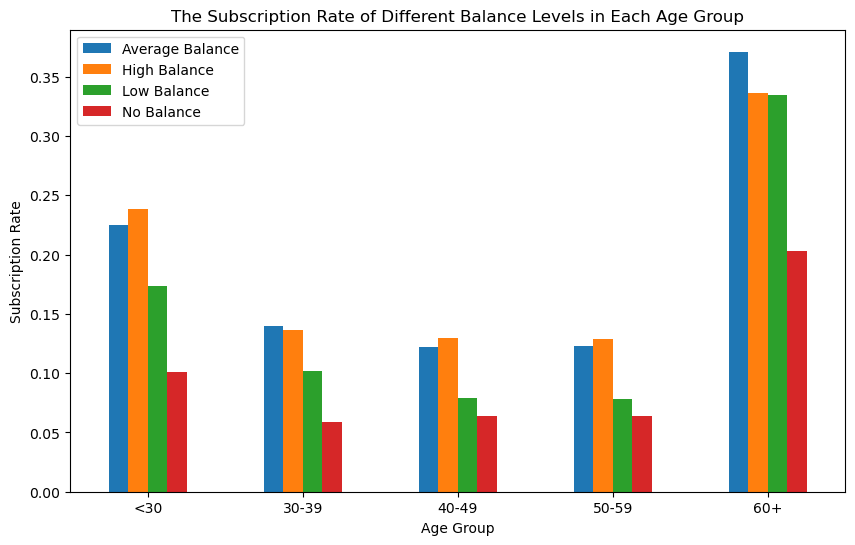

In [43]:
age_balance1=pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2=pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response']=age_balance2['response']
age_balance1['response_rate']=age_balance1['response_binary']/ (age_balance1['response'])
age_balance1=age_balance1.drop(['response_binary','response'],axis =1)

age_balance1=age_balance1.unstack()
age_bal=age_balance1.plot(kind='bar',figsize = (10,6))

#Set x ticks
plt.xticks(np.arange(5),('<30','30-39','40-49','50-59','60+'),rotation='horizontal')

#Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc='best',ncol=1)
plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

+ Insights:target older clients with high balance levels.
+ While age represents a person’s life stage and balance represents a person’s financial condition, jointly evaluating the impact of these two factors enables us to investigate if there is a common trend across all ages, and to identify which combination of client features indicates the highest likelihood of subscription.
+ In order to investigate the combined effect of age and balance on a client’s decision, we performed a two-layer grouping, segmenting customers according to their balance levels within each age group.
+ The graph tells the same story regarding the subscription rate for different age groups: the willingness to subscribe is exceptionally high for people aged above 60 and younger people aged below 30 also have a distinguishable higher subscription rate than those of other age groups.
+ Furthermore, the effect of balance levels on subscription decision is applicable to each individual age group: every age group shares a common trend that the percentage of subscription increases with balance.
+ In sum, the bank should prioritize its telemarketing to clients who are above 60 years old and have positive balances, because they have the highest acceptance rate of about 35%. The next group the bank should focus on is young clients with positive balances, who showed high subscription rates between 15% and 20%.

In [44]:
count_job_response_pct=pd.crosstab(df['response'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct=count_job_response_pct.transpose()
count_job_response_pct

response,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


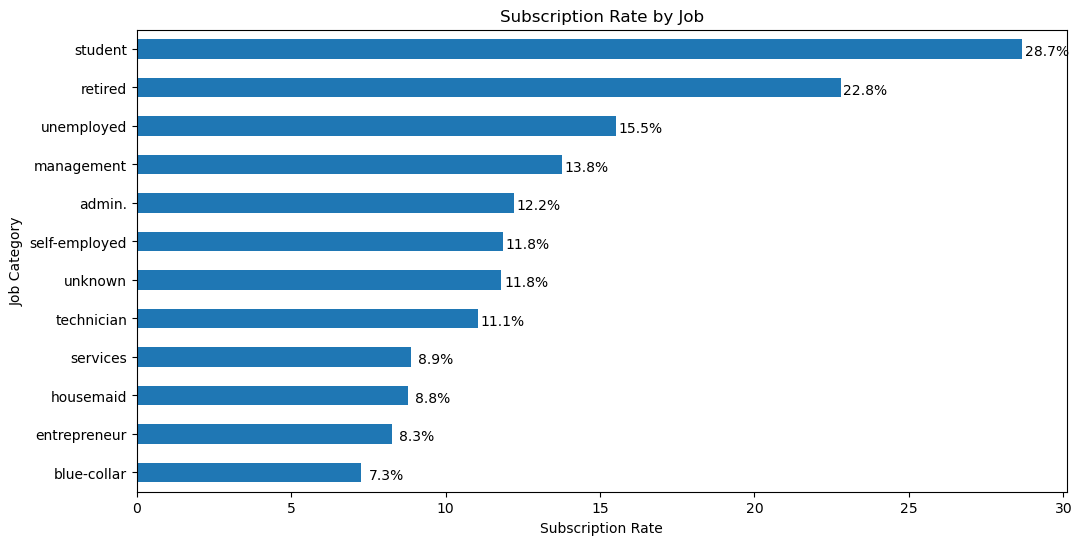

In [45]:
#Visualize the subscription rate by job
plot_job=count_job_response_pct['yes'].sort_values(ascending=True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec,label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending=True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha='center', 
                  va='bottom')

+ Insights: target students and retired clients
+ As noted from the horizontal bar chart, students and retired clients account have more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.

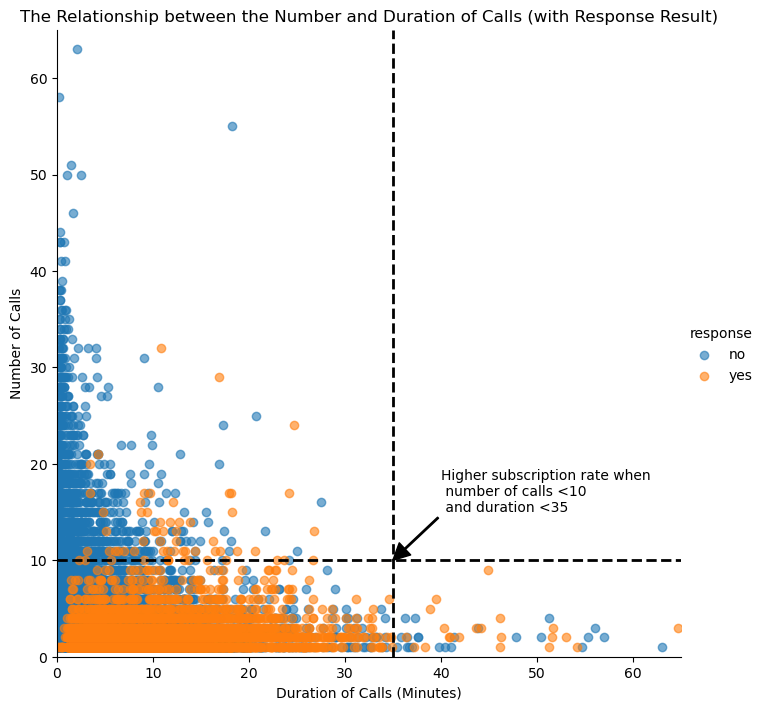

In [46]:
df1=df.copy()
# Change the unit of 'duration' from seconds to minutes
df1['duration']=df1['duration'].apply(lambda n:n/60).round(2)
#Visualize the relationship between 'duration' & 'campaign': with response result
dur_cam=sns.lmplot(x='duration',y='campaign',data=df1,
                     hue='response',
                     fit_reg= False,
                     scatter_kws={'alpha':0.6},height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=10,linewidth=2,color="k",linestyle='--')
plt.axvline(x=35,linewidth=2,color="k",linestyle='--' )
plt.annotate("Higher subscription rate when \n number of calls <10 \n and duration <35",xytext=(40,15),
             arrowprops=dict(color='k',width=1),xy=(35,10))
plt.show()

+ In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".
+ As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after 6 campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.
+ This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.

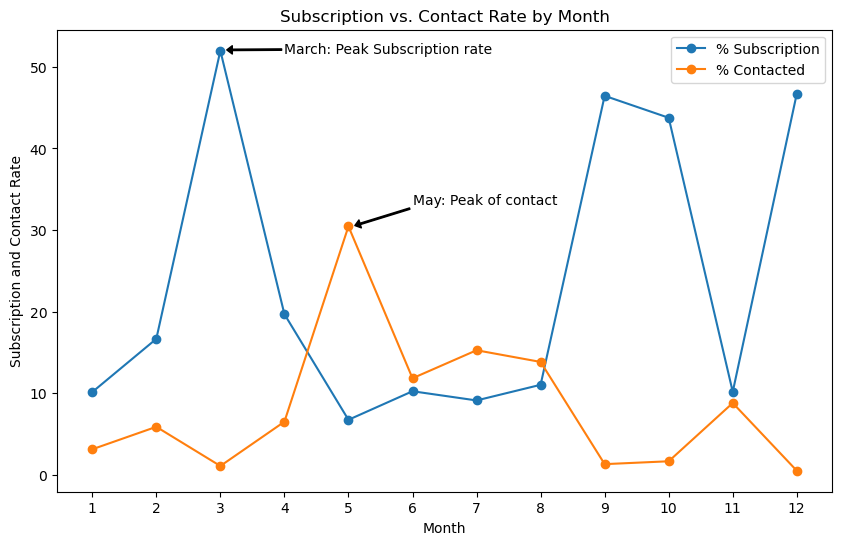

In [47]:
#Visualize the subscription and contact rate by month

#Change 'month' from words to numbers for easier analysis
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1=df1.replace(order)

count_month_response_pct=pd.crosstab(df1['response'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct=count_month_response_pct.transpose()
month=pd.DataFrame(df1['month'].value_counts())
month['% Contacted']=month['month']*100/month['month'].sum()
month['% Subscription']=count_month_response_pct['yes']
month.drop('month',axis=1,inplace = True)

month['Month']=[5,7,8,6,11,4,2,1,10,9,3,12]
month=month.sort_values('Month',ascending=True)
plot_month=month[['% Subscription','% Contacted']].plot(kind='line',
                                                          figsize=(10,6),
                                                          marker='o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks=np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y=month['% Contacted'].max()
x=month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y=month['% Subscription'].max()
x=month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

+ Insights: initiate the telemarketing campaign in fall or spring
+ Besides customer characteristics, external factors may also have an impact on the subscription rate, such as seasons and the time of calling. So the month of contact is also analyzed here.
+ This line chart displays the bank’s contact rate in each month as well as clients’ response rate in each month. One way to evaluate the effectiveness of the bank's marketing plan is to see whether these two lines have a similar trend over the same time horizon.
+ The bank contacted most clients between May and August. The highest contact rate is around 30%, which happened in May, while the contact rate is closer to 0 in March, September, October, and December.
+ However, the subscription rate showed a different trend. The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.
+ Clearly, these two lines move in different directions which strongly indicates the inappropriate timing of the bank’s marketing campaign. To improve the marketing campaign, the bank should consider initiating the telemarketing campaign in fall and spring when the subscription rate tends to be higher.
+ Nevertheless, the bank should be cautious when analyzing external factors. More data from previous marketing campaign should be collected and analyzed to make sure that this seasonal effect is constant over time and applicable to the future.

In [48]:
count_education_response_pct=pd.crosstab(df['response'],df['education']).apply(lambda x: x/x.sum() * 100)
count_education_response_pct=count_education_response_pct.transpose()
count_education_response_pct

response,no,yes
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


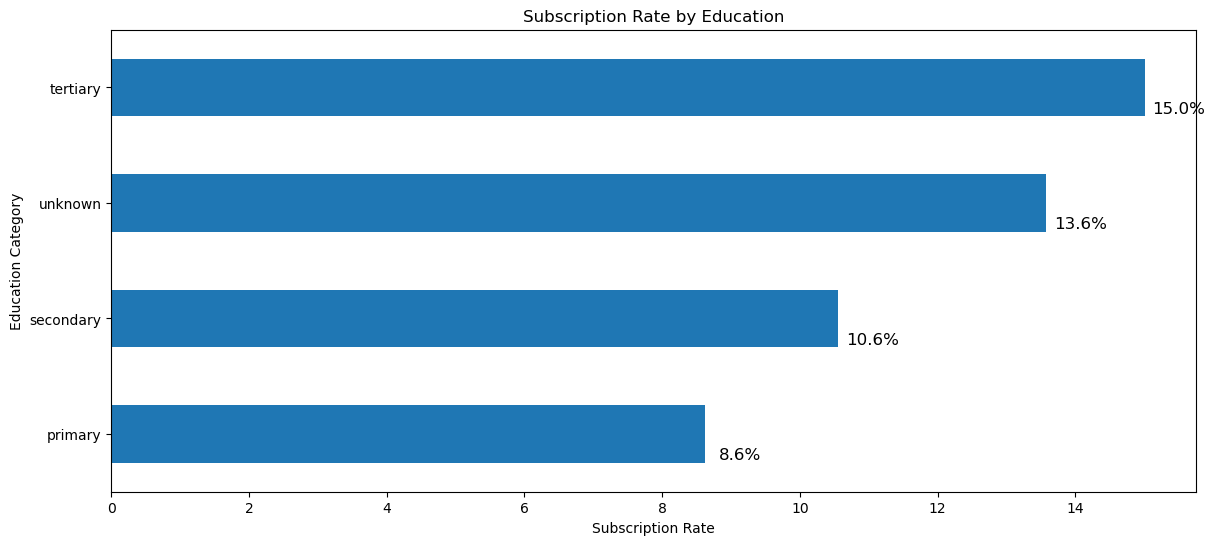

In [49]:
#Visualize the subscription rate by Education
plot_education=count_education_response_pct['yes'].sort_values(ascending=True).plot(kind ='barh',
                                                                           figsize=(14,6))
                                                                               
plt.title('Subscription Rate by Education')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_education.patches,
                      count_education_response_pct['yes'].sort_values(ascending=True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.5, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom',
                fontsize = 'large')

###### Checking for imbalanced or balanced dataset with regards to the target variable
+ Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.
+ Here, the class “No” is called the majority class, and the much smaller in size “Yes” class is called the minority class.

In [50]:
countNotermdeposit=len(Data[Data.y=='no'])
counthavetermdeposit=len(Data[Data.y=='yes'])
print("Percentage of customer doesn't have a term deposit: {:.2f}%".format((countNotermdeposit / (len(Data.y))*100)))
print("Percentage of customer have a term deposit: {:.2f}%".format((counthavetermdeposit / (len(Data.y))*100)))

Percentage of customer doesn't have a term deposit: 88.30%
Percentage of customer have a term deposit: 11.70%


In [51]:
Data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

###### Problems with imbalanced data classification
+ The main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class?
+ Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. In this case, the confusion matrix for the classification problem shows how well our model classifies the target classes and we arrive at the accuracy of the model from the confusion matrix.
+ It is calculated based on the total number of correct predictions by the model divided by the total number of predictions. In  an example case it is (0+95)/(0+95+0+5)=0.95 or 95%. It means that the model fails to identify the minority class yet the accuracy score of the model will be 95%

+ Thus our traditional approach of classification and model accuracy calculation is not useful in the case of the imbalanced dataset.

###### Cleaning the dataset

There is no missing value in this dataset.But there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

In [52]:
cols=[col for col in Data.columns]
col_missing=[]
for col in cols:
    if 'unknown' in Data[col].values:
        col_missing.append(col)
        
print("Columns with Unknown Values -",col_missing) 

Columns with Unknown Values - ['job', 'education', 'contact', 'poutcome']


'Unkown' values are found in some of the features.We need to handle those values

In [53]:
print("Unknown values count")
for col in col_missing:
    print(col,"-",Data[Data[col].str.contains('unknown')][col].count())

Unknown values count
job - 288
education - 1857
contact - 13020
poutcome - 36959


In [54]:
#Replace 'unknown' with 'other'
Bank_data[['job','education','contact','poutcome']]=Bank_data[['job','education','contact','poutcome']].replace(['unknown'],'other')

In [55]:
# Perform one-hot encoding using pandas.get_dummies()
Bank_data=pd.get_dummies(Bank_data,columns=['default','housing','loan','y'],drop_first=True)

In [56]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
Bank_data=Bank_data.replace(order)

In [57]:
from sklearn.preprocessing import LabelEncoder

#Initialize the LabelEncoder
label_encoder=LabelEncoder()

#Label encode the categorical columns
for col in ['job','marital','education','contact','poutcome']:
    Bank_data[col]=label_encoder.fit_transform(Bank_data[col])

In [58]:
Bank_data.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default_yes,housing_yes,loan_yes,y_yes
0,58,4,1,3,2143,1,5,5,261,1,-1,0,1,0,1,0,0
1,44,10,2,2,29,1,5,5,151,1,-1,0,1,0,1,0,0
2,33,2,1,2,2,1,5,5,76,1,-1,0,1,0,1,1,0
3,47,1,1,0,1506,1,5,5,92,1,-1,0,1,0,1,0,0
4,33,5,2,0,1,1,5,5,198,1,-1,0,1,0,0,0,0


In [59]:
# Change the unit of 'duration' from seconds to minutes
Bank_data['duration']=Bank_data['duration'].apply(lambda n:n/60).round(2)

In [60]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          45211 non-null  int64  
 1   job          45211 non-null  int32  
 2   marital      45211 non-null  int32  
 3   education    45211 non-null  int32  
 4   balance      45211 non-null  int64  
 5   contact      45211 non-null  int32  
 6   day          45211 non-null  int64  
 7   month        45211 non-null  int64  
 8   duration     45211 non-null  float64
 9   campaign     45211 non-null  int64  
 10  pdays        45211 non-null  int64  
 11  previous     45211 non-null  int64  
 12  poutcome     45211 non-null  int32  
 13  default_yes  45211 non-null  uint8  
 14  housing_yes  45211 non-null  uint8  
 15  loan_yes     45211 non-null  uint8  
 16  y_yes        45211 non-null  uint8  
dtypes: float64(1), int32(5), int64(7), uint8(4)
memory usage: 3.8 MB


In [61]:
#scalling data
from sklearn.preprocessing import StandardScaler

df_standard_scaled=Bank_data.copy()
column_name=['balance','age','duration']
features=df_standard_scaled[column_name]
rest=[columns for columns in Bank_data.columns if columns not in column_name]

scaler=StandardScaler().fit(features.values)
features=scaler.transform(features.values)
df_standard_scaled=pd.DataFrame(features,columns=column_name)
df_standard_scaled[rest]=Bank_data[rest]
df_standard_scaled.head()

,balance,age,duration,job,marital,education,contact,day,month,campaign,pdays,previous,poutcome,default_yes,housing_yes,loan_yes,y_yes
0,0.256419,1.606965,0.011014,4,1,3,1,5,5,1,-1,0,1,0,1,0,0
1,-0.437895,0.288529,-0.415353,10,2,2,1,5,5,1,-1,0,1,0,1,0,0
2,-0.446762,-0.747384,-0.706586,2,1,2,1,5,5,1,-1,0,1,0,1,1,0
3,0.047205,0.571051,-0.646010,1,1,0,1,5,5,1,-1,0,1,0,1,0,0
4,-0.447091,-0.747384,-0.233623,5,2,0,1,5,5,1,-1,0,1,0,0,0,0


In [62]:
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

###### Feature Selection
+ Recursive Feature Elimination:

For feature selection, we wil use the Recursive Feature Elimination (RFE).We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [63]:
x=df_standard_scaled.drop('y_yes',1)
y=df_standard_scaled['y_yes']

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [65]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36168, 16)
Shape of X_test:  (9043, 16)
Shape of y_train:  (36168,)
Shape of y_test (9043,)


In [66]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

In [67]:
# Model to Test
classifier=LogisticRegression()

# Select Best X Features
rfe=RFE(classifier,n_features_to_select=10)
rfe=rfe.fit(x_train, y_train)

In [68]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True  True  True False False  True False  True
  True  True  True  True]
[3 2 1 5 1 1 1 6 4 1 7 1 1 1 1 1]


In [69]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('balance', False, 3),
 ('age', False, 2),
 ('duration', True, 1),
 ('job', False, 5),
 ('marital', True, 1),
 ('education', True, 1),
 ('contact', True, 1),
 ('day', False, 6),
 ('month', False, 4),
 ('campaign', True, 1),
 ('pdays', False, 7),
 ('previous', True, 1),
 ('poutcome', True, 1),
 ('default_yes', True, 1),
 ('housing_yes', True, 1),
 ('loan_yes', True, 1)]

In [70]:
x_train.columns[rfe.support_]

Index(['duration', 'marital', 'education', 'contact', 'campaign', 'previous',
       'poutcome', 'default_yes', 'housing_yes', 'loan_yes'],
      dtype='object')

In [71]:
x_train.columns[~rfe.support_]

Index(['balance', 'age', 'job', 'day', 'month', 'pdays'], dtype='object')

In [72]:
import statsmodels.api as sm

col1=x_train.columns[rfe.support_]
x_train_sm=sm.add_constant(x_train[col1])
logm1=sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  y_yes   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36157
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9629.4
Date:                Fri, 21 Jul 2023   Deviance:                       19259.
Time:                        09:18:01   Pearson chi2:                 4.50e+15
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1720
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.9479      0.090    -32.600      0.000      -3.125      -2.771
duration        1.0059      0.017     57.851      0.000       0.972       1.040
marital         0.1654      0.031      5.342      0.000       0.105       0.226
education       0.1348      0.025      5.423      0.000       0.086       0.184
contact        -0.5853      0.038    -15.414      0.000      -0.660      -0.511
campaign       -0.1471      0.011    -13.140      0.000      -0.169      -0.125
previous        0.1418      0.008     18.320      0.000       0.127       0.157
poutcome        1.1531      0.049     23.526      0.000       1.057       1.249
default_yes    -0.4552      0.176     -2.582      0.010      -0.801      -0.110
housing_yes    -1.0022      0.040    -24.844      0.000      -1.081      -0.923
loan_yes       -0.7178      0.064    -11.266      0.000      -0.843      -0.593
===============================================================================
"""

In [73]:
# predicted values of the train dataset giving the probability
x_test_sm=sm.add_constant(x_test[col1])
y_test_pred=res.predict(x_test_sm)
y_test_pred[:10]

14001    0.006149
32046    0.698092
13318    0.015104
42991    0.003296
14237    0.028155
14360    0.026711
36635    0.054984
37042    0.014223
25994    0.105031
14555    0.006913
dtype: float64

In [74]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.00614931, 0.69809245, 0.01510408, 0.00329599, 0.02815516,
       0.0267108 , 0.05498397, 0.01422336, 0.10503087, 0.00691346])

In [75]:
#Creating the dataframe with the actual subscription flag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Sub':y_test.values,'Sub_prob':y_test_pred})
y_test_pred_final['Cust_id'] = y_test.index
y_test_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.006149,14001
1,1,0.698092,32046
2,0,0.015104,13318
3,0,0.003296,42991
4,0,0.028155,14237
5,0,0.026711,14360
6,0,0.054984,36635
7,0,0.014223,37042
8,0,0.105031,25994
9,0,0.006913,14555


In [76]:
#Creating new column 'predict' with 1 if Sub_prob > 0.5 else 0
y_test_pred_final['predict'] = y_test_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_test_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.006149,14001,0
1,1,0.698092,32046,1
2,0,0.015104,13318,0
3,0,0.003296,42991,0
4,0,0.028155,14237,0
5,0,0.026711,14360,0
6,0,0.054984,36635,0
7,0,0.014223,37042,0
8,0,0.105031,25994,0
9,0,0.006913,14555,0


In [77]:
# creating confusion matrix for the following prediction
confusion = cm(y_test_pred_final.Sub, y_test_pred_final.predict)
confusion

array([[7819,  161],
       [ 807,  256]], dtype=int64)

In [78]:
print(ac(y_test_pred_final.Sub, y_test_pred_final.predict))

0.8929558774742895


The accuracy of the model is approximately 90% which is a really good model for prediction

In [79]:
# print the classification report
print('After Feature Selection','\n',report(y_test_pred_final.Sub, y_test_pred_final.predict))

After Feature Selection 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7980
           1       0.61      0.24      0.35      1063

    accuracy                           0.89      9043
   macro avg       0.76      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043



In [80]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [81]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final.Sub, y_test_pred_final.Sub_prob,drop_intermediate=False)

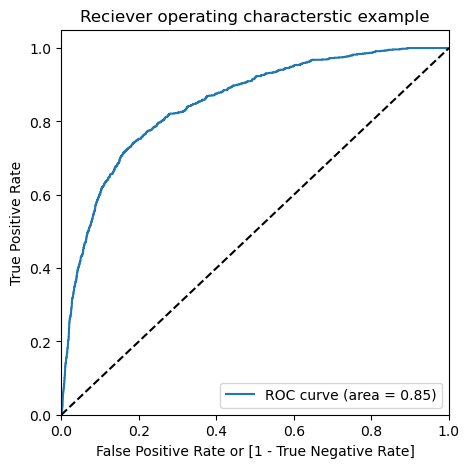

In [82]:
draw_roc(y_test_pred_final.Sub, y_test_pred_final.Sub_prob)

<AxesSubplot:>

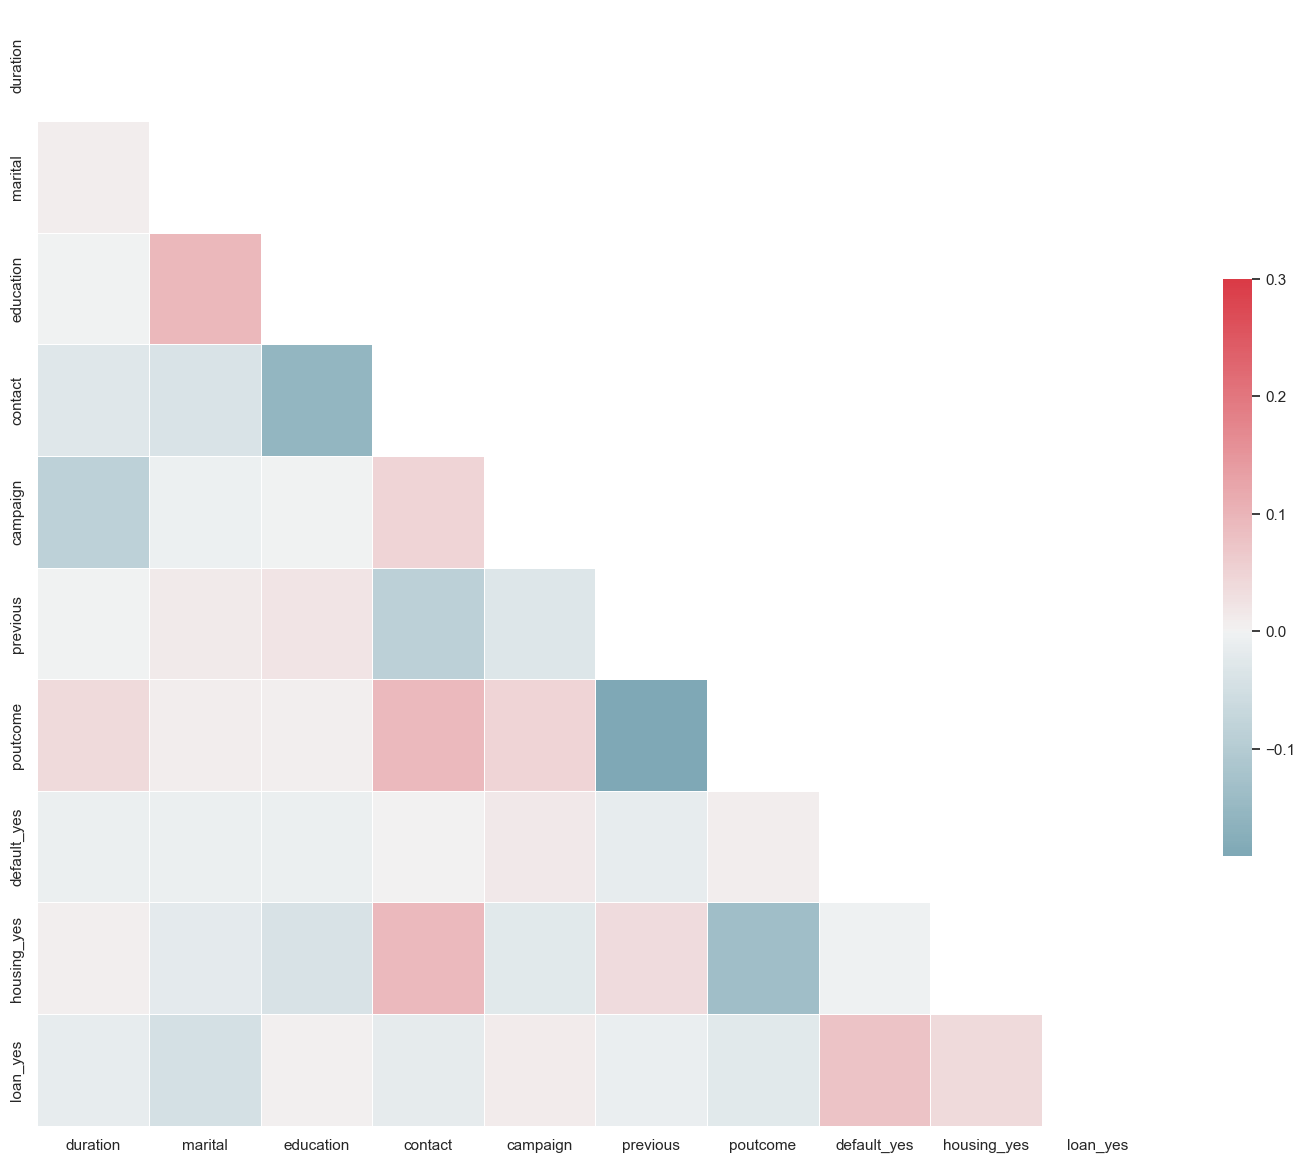

In [83]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = x_train[x_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

In [84]:
#Sklearn Logistic Regression and Accuracy
accuracy = {}

feature_selection = LogisticRegression()
feature_selection.fit(x_train[x_train.columns[rfe.support_]], y_train)
ACC = feature_selection.score(x_test[x_test.columns[rfe.support_]],y_test)*100

accuracy['Logistic Regression after Feature Selection'] = ACC
print("Test Accuracy {:.2f}%".format(ACC))

Test Accuracy 89.30%


Accuracy on the Feature Selected features have 89.30% Accuracy which is still better as we have eliminated some of the features

In [85]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 89.16%


In [86]:
#Predictions
y_predict = lr.predict(x_test)
y_pred = feature_selection.predict(x_test[x_test.columns[rfe.support_]])

print('Without Feature Selection','\n', cm(y_test, y_predict))
print('After Feature Selection','\n', cm(y_test, y_pred))

Without Feature Selection 
 [[7784  196]
 [ 784  279]]
After Feature Selection 
 [[7819  161]
 [ 807  256]]


In [87]:
# print the classification report

print('Without Feature Selection','\n',report(y_test, y_predict))
print('After Feature Selection','\n',report(y_test, y_pred))

Without Feature Selection 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7980
           1       0.59      0.26      0.36      1063

    accuracy                           0.89      9043
   macro avg       0.75      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043

After Feature Selection 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7980
           1       0.61      0.24      0.35      1063

    accuracy                           0.89      9043
   macro avg       0.76      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043



Without Feature Selection is performing well we will continue with what Modelf or below reasons:
+ F1-score for 1's has scored better
+ Accuracy is also slightly higher
+ Recall is higher but precision is lower
+ True Postive Rate is better
###### predict_proba method
predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.
0 is for probability of Refusal and 1 is for probability of Subscription.

In [88]:
lr.predict_proba(x)[:,1] 

array([0.05427157, 0.02767713, 0.01237418, ..., 0.94711599, 0.08903704,
       0.42000015])

Now,we can compare the train-set and test-set accuracy to check for overfitting.
###### Check for overfitting and underfitting

In [89]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(lr.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(lr.score(x_test, y_test)*100))

Training set score: 89.62%
Test set score: 89.16%


The training-set accuracy score is 89.62% while the test-set accuracy to be 89.16% These two values are quite comparable. So, there is no question of overfitting

###### Compare model accuracy with null accuracy
So, the model accuracy is 89.62%. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
So, we should first check the class distribution in the test set.

In [90]:
# check class distribution in test set

y_test.value_counts()

0    7980
1    1063
Name: y_yes, dtype: int64

calculate the percentage of ones because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones

In [91]:
print("Mean of 1's",y_test.mean(),"\n Percentage of 1's",np.round(y_test.mean(),2)*100,'%')

Mean of 1's 0.1175494857901139 
 Percentage of 1's 12.0 %


In [92]:
# calculate the percentage of zeros
print("Mean of 0's",1-y_test.mean(),"\n Percentage of 0's",np.round(1-y_test.mean(),2)*100,'%')

Mean of 0's 0.8824505142098861 
 Percentage of 0's 88.0 %


In [93]:
# calculate null accuracy 
y_test.value_counts().head(1) / len(y_test)

0    0.882451
Name: y_yes, dtype: float64

This means that a dumb model that always predicts 0 would be right 88% of the time

This shows how classification accuracy is not that good as it's close to a dumb model
It's a good way to know the minimum we should achieve with our models
+ Conclusion:

Classification accuracy is the easiest classification metric to understand
But, it does not tell you the underlying distribution of response values
We examine by calculating the null accuracy And, it does not tell you what "types" of errors your classifier is making

###### Confusion matrix
Table that describes the performance of a classification model

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-
+ True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.
+ True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.
+ False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.
+ False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [94]:
#Predictions
y_predict=lr.predict(x_test)
print(cm(y_test, y_predict))

[[7784  196]
 [ 784  279]]


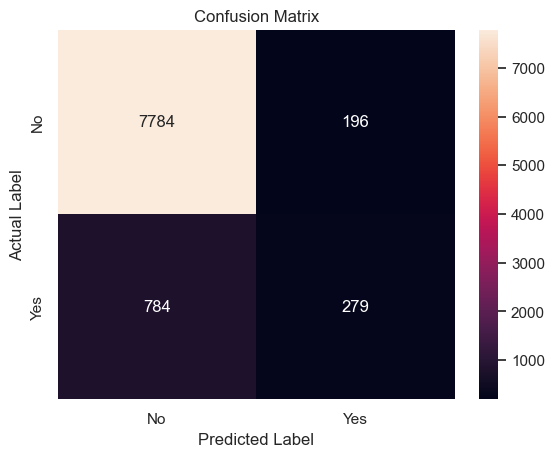

In [95]:
# plot confusion matrix to describe the performance of classifier.
cm_df=cm(y_test,y_predict)
class_label=["No", "Yes"]
df_cm=pd.DataFrame(cm_df,index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [96]:
y_predict=lr.predict(x)
print(cm(y,y_predict))

[[39024   898]
 [ 3836  1453]]


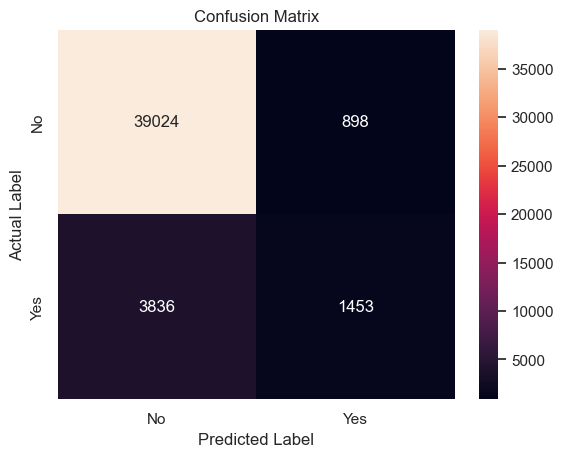

In [97]:
# plot confusion matrix to describe the performance of classifier.
cm_df=cm(y,y_predict)
class_label=["No","Yes"]
df_cm=pd.DataFrame(cm_df,index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Basic terminology
+ True Positives (TP): we correctly predicted that they do have subscription
289
+ True Negatives (TN): we correctly predicted that they don't have subscription
7779
+ False Positives (FP): we incorrectly predicted that they do have subscription (a "Type I error")
774
+ Falsely predict positive
Type I error
+ False Negatives (FN): we incorrectly predicted that they don't have subscription (a "Type II error")
201
+ Falsely predict negative
Type II error

In [99]:
# save confusion matrix and slice into four pieces
confusion=cm(y,y_predict)
print(confusion)
#[row, column]
TP=confusion[1, 1]
TN=confusion[0, 0]
FP=confusion[0, 1]
FN=confusion[1, 0]

[[39024   898]
 [ 3836  1453]]


In [101]:
# use float to perform true division, not integer division
print((TP+TN)/float(TP+TN+FP+FN))
print(ac(y,y_predict))

0.8952909690119661
0.8952909690119661


In [103]:
classification_error=(FP+FN)/float(TP+TN+FP+FN)
print(classification_error)
print(1-ac(y,y_predict))

0.10470903098803389
0.10470903098803386


Recall: When the actual value is positive, how often is the prediction correct?

+ Something we want to maximize
+ How "sensitive" is the classifier to detecting positive instances?
+ Also known as "True Positive Rate" or "Sensitivity"
+ TP / all positive
+ all positive = TP + FN

In [105]:
recall=TP/float(FN+TP)
print(recall)
print(recall_score(y, y_predict))

0.2747211193042163
0.2747211193042163


Specificity: When the actual value is negative, how often is the prediction correct?

+ Something we want to maximize
+ How "specific" (or "selective") is the classifier in predicting positive instances?
+ TN / all negative
+ all negative = TN + FP

In [106]:
specificity=TN/(TN+FP)
print(specificity)

0.9775061369670858


Our classifier
+ Highly specific
+ Not sensitive

False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [107]:
false_positive_rate=FP/float(TN+FP)
print(false_positive_rate)
print(1-specificity)

0.02249386303291418
0.02249386303291423


Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [109]:
precision=TP/float(TP+FP)
print(precision)
print(precision_score(y, y_predict))

0.6180348787749894
0.6180348787749894


f1-score

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [111]:
f1_score=2*((precision_score(y, y_predict)*recall_score(y, y_predict))/(precision_score(y, y_predict)+recall_score(y, y_predict)))
f1_score

0.38036649214659685

In [112]:
#The threshold level
#print the first 10 predicted probabilities of two classes- 0 and 1
y_pred_prob=lr.predict_proba(x_test)[0:10]
y_pred_prob

array([[0.99811313, 0.00188687],
       [0.35511282, 0.64488718],
       [0.98051966, 0.01948034],
       [0.99339136, 0.00660864],
       [0.96656106, 0.03343894],
       [0.97063688, 0.02936312],
       [0.94370764, 0.05629236],
       [0.95366766, 0.04633234],
       [0.92923416, 0.07076584],
       [0.99280797, 0.00719203]])

Observations

+ In each row, the numbers sum to 1.
+ There are 2 columns which correspond to 2 classes - 0 and 1.
  + Class 0 - predicted probability that there is no Subscription.
  + Class 1 - predicted probability that there is Subscriptionw.
+ Importance of predicted probabilities
  + We can rank the observations by probability of Subscription or no Subscription.
+ predict_proba process
  + Predicts the probabilities
  + Choose the class with the highest probability
+ Classification threshold level
  + There is a classification threshold level of 0.5.
  + Class 1 - probability of Subscription is predicted if probability > 0.5.
  + Class 0 - probability of no Subscription is predicted if probability < 0.5.

In [113]:
# store the probabilities in dataframe
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Subscription (0)', 'Prob of - Subscription (1)'])
y_pred_prob_df

,Prob of - No Subscription (0),Prob of - Subscription (1)
0,0.998113,0.001887
1,0.355113,0.644887
2,0.980520,0.019480
3,0.993391,0.006609
4,0.966561,0.033439
5,0.970637,0.029363
6,0.943708,0.056292
7,0.953668,0.046332
8,0.929234,0.070766
9,0.992808,0.007192


Text(0, 0.5, 'Frequency')

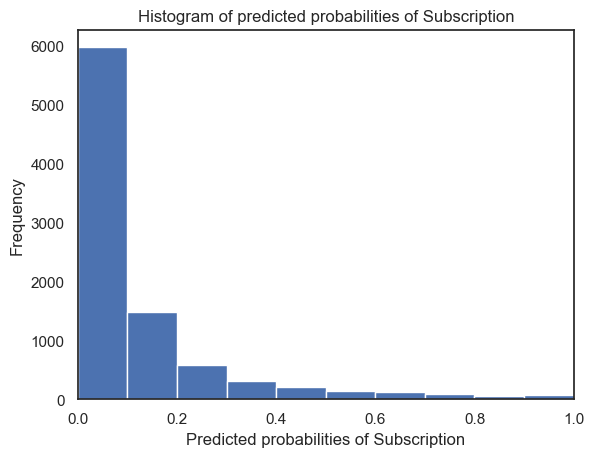

In [114]:
# store the predicted probabilities for class 1 - Probability of Subscription
y_pred1 = lr.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

Observations
+ We can see that the above histogram is highly positive skewed.
+ The first column tell us that there are approximately 6000 observations with probability between 0.0 and 0.1.
+ There are small number of observations with probability > 0.5.
+ So, these small number of observations predict that there will be a Subscription.
+ Majority of observations predict that there will be no Subscription.

In [115]:
#Lower the Threshold
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = lr.predict_proba(x_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, threshold=i/10)
       
    cm1 = cm(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
               'Accuracy score: ', (ac(y_test, y_pred2)), '\n\n',
           
               'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
               'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
                '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[5788 2192]
 [ 193  870]] 

 with 6658 correct predictions,  

 2192 Type I errors( False Positives),  

 193 Type II errors( False Negatives),  

 Accuracy score:  0.7362600906778723 

 Sensitivity:  0.8184383819379115 

 Specificity:  0.72531328320802 



With 0.2 threshold the Confusion Matrix is  

 [[7058  922]
 [ 397  666]] 

 with 7724 correct predictions,  

 922 Type I errors( False Positives),  

 397 Type II errors( False Negatives),  

 Accuracy score:  0.854141324781599 

 Sensitivity:  0.6265286923800565 

 Specificity:  0.8844611528822055 



With 0.3 threshold the Confusion Matrix is  

 [[7488  492]
 [ 555  508]] 

 with 7996 correct predictions,  

 492 Type I errors( False Positives),  

 555 Type II errors( False Negatives),  

 Accuracy score:  0.8842198385491541 

 Sensitivity:  0.477892756349953 

 Specificity:  0.9383458646616541 



With 0.4 threshold the Confusion Matrix is  

 [[7673  307]
 [ 687  376]] 

 with 

Comments
+ In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.
+ Threshold can be adjusted to increase sensitivity or specificity.
+ Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.
+ We can see that increasing the threshold level results in increased accuracy.
+ Adjusting the threshold level should be one of the last step you do in the model-building process.

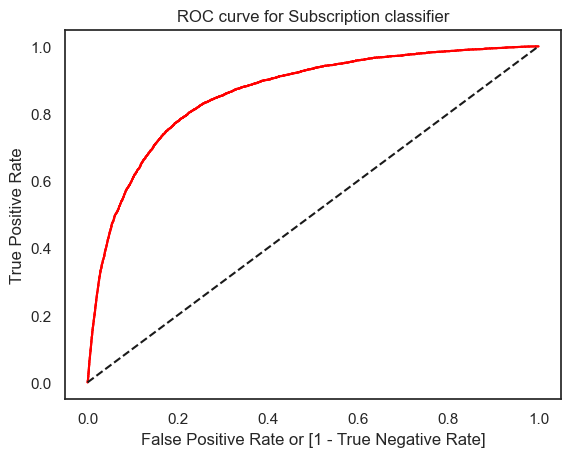

AUC-ROC Score: 0.6261136281356511


In [117]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_predict)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve for Subscription classifier')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC-ROC Score:',auc)

In [119]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y, y_predict)
print(curve)

0.6261136281356511


Comments
+ ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.
+ ROC AUC of our model approaches towards 0.5. So, we can conclude that our classifier doesn't do a good job in predicting whether it will subscription or not.

In [120]:
#Finding the Optimcal Threshold Value
final_prediction = lr.predict_proba(x)[:,1]
fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(ac(y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
1346,0.449954,0.896441
1391,0.439212,0.896441
1393,0.438931,0.896441
1373,0.443067,0.896419
1294,0.461641,0.896419


If this was a use case for balaced dataset we would have gone with accuracy to select the optimal threshold value, otherwise it depends when data is imbalanced sometimes recall is more important than precision and sometimes the other way around and sometimes both are more important then we will go with F1-Score to select the optimal threshold value.

In [121]:
final_prediction = lr.predict_proba(x)[:,1]
fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])

f1_score_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    f1_score_ls.append(f1_score(y, y_pred))
    
f1_score_ls = pd.concat([pd.Series(thresholds), pd.Series(f1_score_ls)],axis=1)
f1_score_ls.columns = ['thresholds', 'f1_score']
f1_score_ls.sort_values(by='f1_score', ascending=False, inplace=True)
f1_score_ls.head()

TypeError: 'numpy.float64' object is not callable

In [123]:
# print the classification report
print(report(y, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.62      0.27      0.38      5289

    accuracy                           0.90     45211
   macro avg       0.76      0.63      0.66     45211
weighted avg       0.88      0.90      0.88     45211



Classification report shows the precision, recall, F1 and support scores for the Logistic Regression classification model.

Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 91%.

Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 97% correctly that they would decline the offer.

In general, the report shows that Logistic Regression model has great predictive power to identify the customers who would not subscribe to the term deposit. However, because of the limited number of clients accepting the term deposit, there is a need for stratified sampling or rebalancing to deal with this structural weakness before we conclude whether LR algorithm can accurately classify those who are more likely to subscribe.

In [124]:
#Predictions
y_pred = lr.predict(x)

# Creating a datframe to with actual value and predicted value

predict = pd.DataFrame({'Actual':y,'Predicted':y_pred})
predict

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [126]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 235.6/235.6 kB 720.1 kB/s eta 0:00:00
     ------------------------------------ 302.0/302.0 kB 812.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [127]:
# import imblearn library and resample the original data using SMOTE technique
from sklearn.neighbors import DistanceMetric
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_smote))

Original dataset shape Counter({0: 31942, 1: 4226})
Resampled dataset shape Counter({1: 31942, 0: 31942})


In [128]:
# training a Logistic Regression model on SMOTE data
lr_smote = LogisticRegression()
lr_smote.fit(X_smote, y_smote)

LogisticRegression()

In [129]:
accuracies = {}

acc = lr_smote.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 82.28%


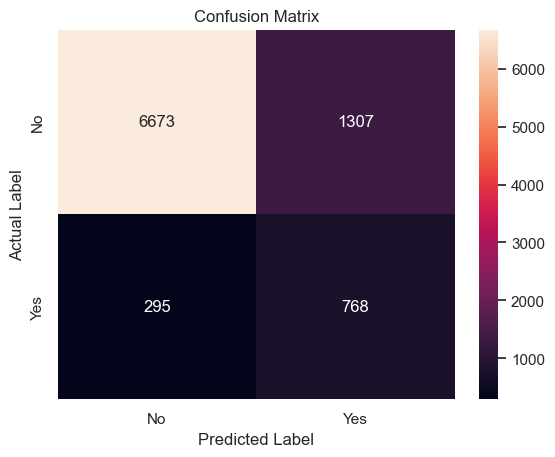

In [130]:
# plot confusion matrix to describe the performance of classifier.
#Predictions
y_predict_smote = lr_smote.predict(x_test)

cm_df_smote=cm(y_test, y_predict_smote)
class_label = ["No", "Yes"]
df_cm_smote = pd.DataFrame(cm_df_smote, index = class_label, columns = class_label)
sns.heatmap(df_cm_smote, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [131]:
# print the classification report
print(report(y_test, y_predict_smote))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      7980
           1       0.37      0.72      0.49      1063

    accuracy                           0.82      9043
   macro avg       0.66      0.78      0.69      9043
weighted avg       0.89      0.82      0.85      9043



In [133]:
pip install plot-metric

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


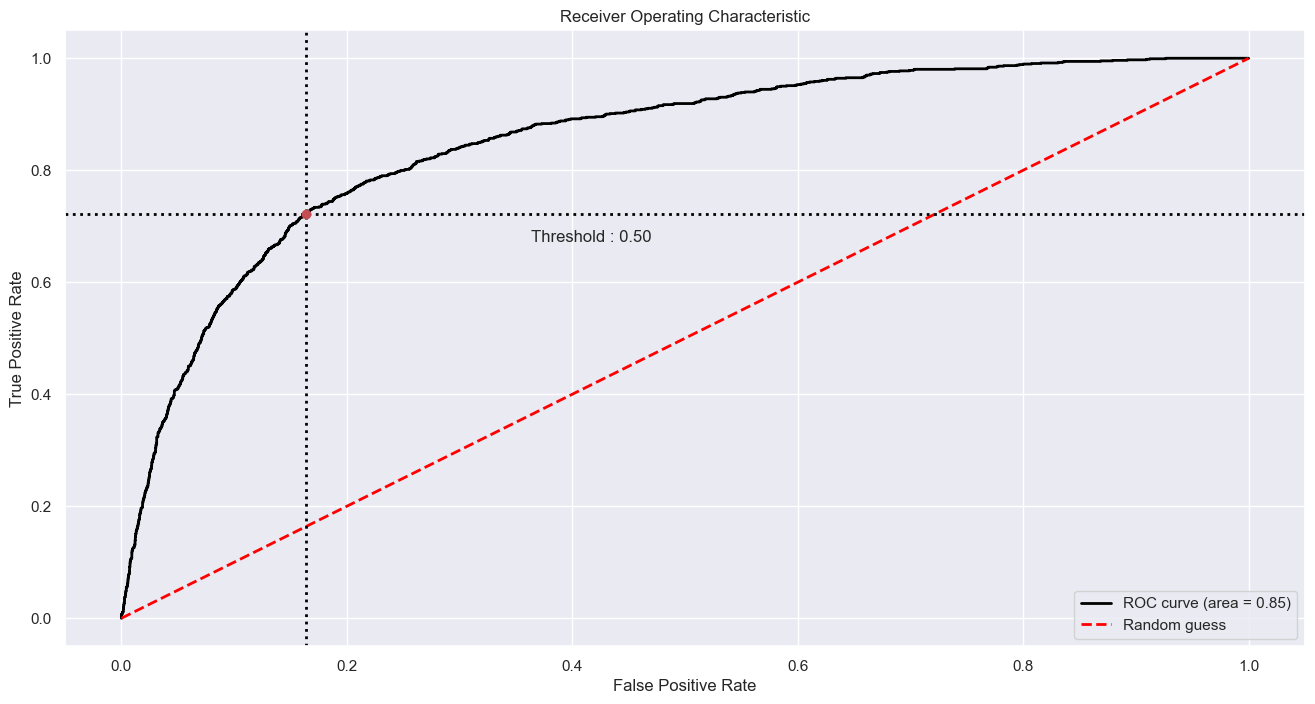

In [134]:
# let's compute the AUC curve for the model we developed on SMOTE data
from plot_metric.functions import BinaryClassification

bc = BinaryClassification(y_test, lr_smote.predict_proba(x_test)[:,1],  labels=[0, 1])
plt.figure(figsize=(16, 8))
bc.plot_roc_curve()
plt.show()

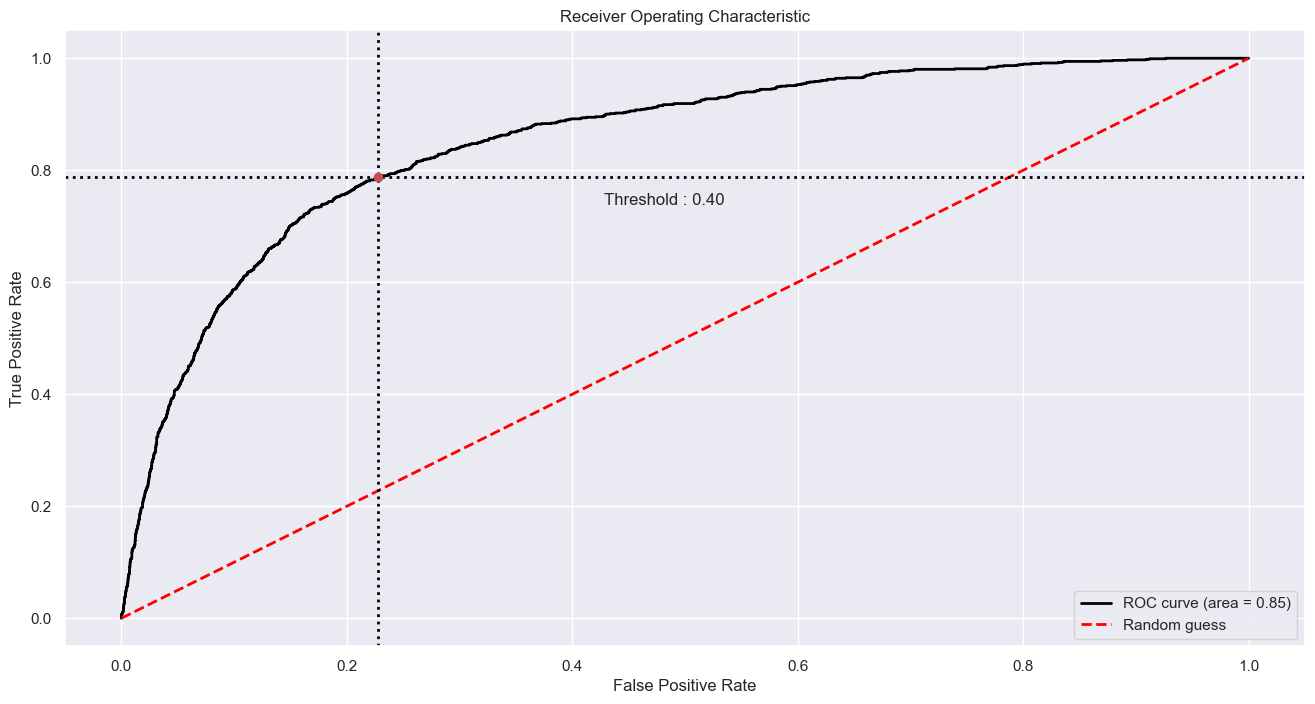

In [135]:
# let's use another probability threshold so that we can get to the elbow position in the above curve
bc = BinaryClassification(y_test, lr_smote.predict_proba(x_test)[:,1], threshold=0.4, labels=[0, 1])
plt.figure(figsize=(16, 8))
bc.plot_roc_curve()
plt.show()

<AxesSubplot:>

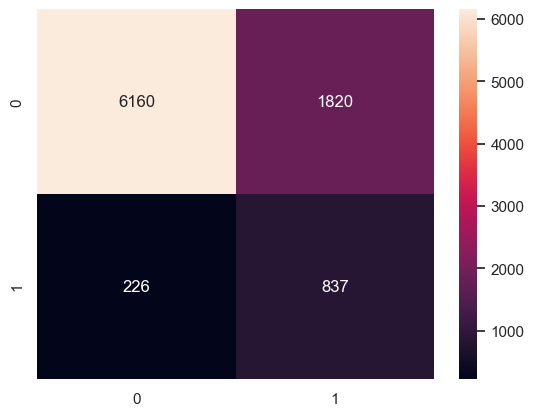

In [136]:
# compute the probabilites of test observations using rf_smote model

y_pred_proba = lr_smote.predict_proba(x_test)[:,1]
# compare these probabilities against the probability threshold of 6% rather than the default threshold of 50%

y_pred_labels = (y_pred_proba >= 0.4)
# plot the confusion matrix

sns.heatmap(cm(y_test, y_pred_labels), annot=True, fmt='0.0f')

In [137]:
# print the classification report
print(report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      7980
           1       0.32      0.79      0.45      1063

    accuracy                           0.77      9043
   macro avg       0.64      0.78      0.65      9043
weighted avg       0.89      0.77      0.81      9043



###### Conclusion
Key outcomes of the analysis are the recommendations for future marketing campaigns:
+ The customer's account balance has a huge influence on the campaign's outcome. People with account balance above 1490 $ are   more likely to subscribe for term deposit, so future address those customers.
+ The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories      below 30 years old and above 50 years old.
+ Number of contacts with the customer during the campaign is also very important. The number of contacts with the customer shouldn't exceed 4.